In [4]:
import csv
from past.builtins import raw_input
from pyparsing import col
import pandas as pd
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold

In [9]:
df_train = pd.read_csv('/home/melek/PycharmProjects/webCrawl/DATA.csv', encoding = "UTF-8", sep=",")

df_train

,FIYAT,IL,ILCE,MAHALLE,ILAN_NO,ARSA_TIPI,METREKARE,TAPU_DURUMU,ILGILI_BELEDIYE,METREKARE_BIRIM_FIYAT,...,PARSEL,KIRA_GETIRISI,TAKAS_BILINMIYOR,TAKAS_EVET,TAKAS_HAYIR,KAT_KARSILIGI_EVET,KAT_KARSILIGI_HAYIR,KREDIYE_UYGUNLUK_BILINMIYOR,KREDIYE_UYGUNLUK_UYGUN,KREDIYE_UYGUNLUK_UYGUN DEGIL
0,165000,BALIKESIR,AYVALIK,ALTINOVA,42916-1540,I_K,255,MUSTAKIL PARSEL,AYVALIK,NaN,...,NaN,NaN,0,1,0,0,1,0,1,0
1,240000,BURSA,YENISEHIR,KOZDERE,69245-16,TARLA,7750,MUSTAKIL PARSEL,YENISEHIR,35.0,...,53.0,NaN,0,0,1,0,1,0,0,1
2,5000000,NIGDE,MERKEZ,AKTAS (DEVLET),117875-28,I_S,52000,NaN,NaN,96153.0,...,NaN,NaN,1,0,0,0,1,1,0,0
3,6848000,NIGDE,CEYHAN,YALAK,0-35832104,TARLA,428000,NaN,NaN,NaN,...,659.0,NaN,1,0,0,0,1,1,0,0
4,115000,ADIYAMAN,KAHTA,CUMHURIYET,118904-18,M_A,410,NaN,NaN,NaN,...,NaN,NaN,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14952,4500000,CANAKKALE,MERKEZ,ISIKLAR,68084-1431,I_T,3810,HISSELI TAPU,CANAKKALE,18.0,...,NaN,NaN,0,0,1,0,1,0,1,0
14953,175000,BURSA,MUSTAFAKEMALPASA,GULLUCE,51334-527,TARLA,4000,MUSTAKIL PARSEL,M.KEMALPASA,64.0,...,234,NaN,0,1,0,0,1,1,0,0
14954,300000,ELAZIG,MERKEZ,ICME (ASAGI ICME),67650-155,BAHCE,16752,MUSTAKIL PARSEL,ELAZIG,18.0,...,4,NaN,0,1,0,0,1,0,0,0
14955,155000,ANKARA,PURSAKLAR,KARAKOY,692606-576,BAG,2590,MUSTAKIL PARSEL,PURSAKLAR,64.0,...,30,NaN,0,1,0,0,1,0,1,0


In [10]:
df_train.info()

len(df_train)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14957 entries, 0 to 14956
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   FIYAT                         14957 non-null  int64  
 1   IL                            14957 non-null  object 
 2   ILCE                          14957 non-null  object 
 3   MAHALLE                       14957 non-null  object 
 4   ILAN_NO                       14957 non-null  object 
 5   ARSA_TIPI                     14957 non-null  object 
 6   METREKARE                     14957 non-null  int64  
 7   TAPU_DURUMU                   10043 non-null  object 
 8   ILGILI_BELEDIYE               8305 non-null   object 
 9   METREKARE_BIRIM_FIYAT         3742 non-null   float64
 10  ADA                           4814 non-null   object 
 11  PARSEL                        5390 non-null   object 
 12  KIRA_GETIRISI                 654 non-null    object 
 13  T

14957

In [175]:
# numeric kolon boş verileri doldurma
flotcol = df_train.describe(include = np.float64).columns
bilgiTable = df_train.describe(include = np.float64)
for nitelik in flotcol:
    x = bilgiTable.loc['count'][nitelik]/10341
    if x < 0.1:
        print("90% boş değer bulundu:{}",nitelik)
    else:
        print("%90 boş değer bulunamadı")
        pass
        #hiçbir şey olmadı
#train[flotcol]=train[flotcol].fillna(0)

train_numeric = df_train._get_numeric_data()


%90 boş değer bulunamadı
%90 boş değer bulunamadı
%90 boş değer bulunamadı
90% boş değer bulundu:{} KIRA_GETIRISI


In [17]:
df_train = df_train.drop(["KIRA_GETIRISI"], axis = 1)

df_train.shape


(10342, 20)

In [4]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
FIYAT,10342.0,5.137556e+06,1.134622e+08,1.0,175000.0,415000.0,1150000.0,7.550000e+09
METREKARE,10342.0,3.325380e+04,5.689879e+05,1.0,543.0,1902.0,7000.0,2.500000e+07
METREKARE_BIRIM_FIYAT,2735.0,1.248308e+04,2.226415e+05,1.0,99.0,345.0,983.0,1.111111e+07
ADA,3490.0,3.274119e+05,1.880892e+07,0.0,1.0,139.0,581.0,1.111111e+09
PARSEL,3901.0,3.416868e+05,1.791489e+07,0.0,2.0,12.0,142.0,1.111111e+09
TAKAS_BILINMIYOR,10342.0,3.163798e-01,4.650855e-01,0.0,0.0,0.0,1.0,1.000000e+00
TAKAS_EVET,10342.0,1.968671e-01,3.976503e-01,0.0,0.0,0.0,0.0,1.000000e+00
TAKAS_HAYIR,10342.0,4.867530e-01,4.998487e-01,0.0,0.0,0.0,1.0,1.000000e+00
KAT_KARSILIGI_EVET,10342.0,8.828080e-02,2.837166e-01,0.0,0.0,0.0,0.0,1.000000e+00
KAT_KARSILIGI_HAYIR,10342.0,9.115258e-01,2.839970e-01,0.0,1.0,1.0,1.0,1.000000e+00


In [18]:
import missingno as msno


<AxesSubplot:>

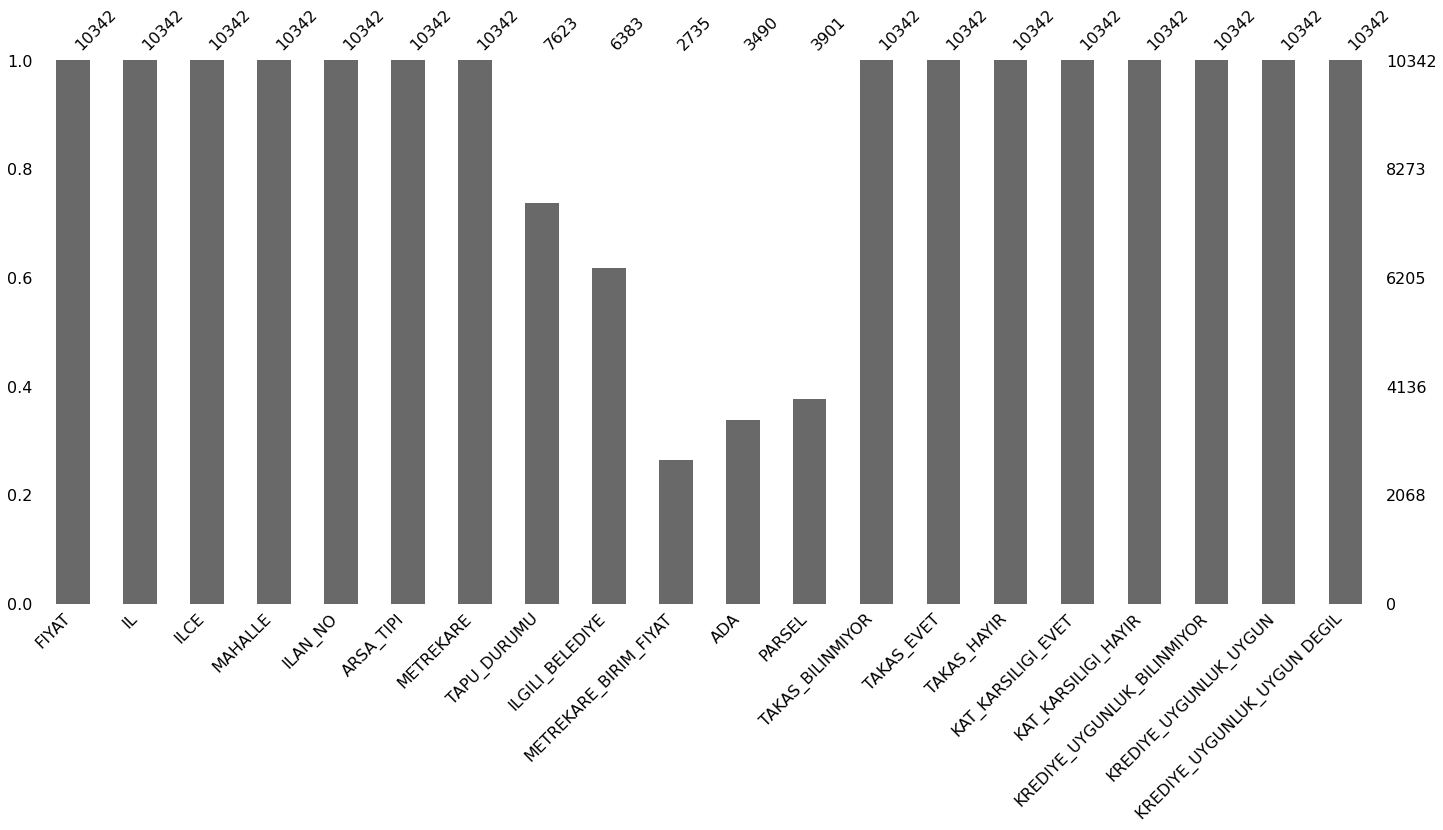

In [19]:
#Eksik veriler gözlemlenir
msno.bar(df_train)

<AxesSubplot:>

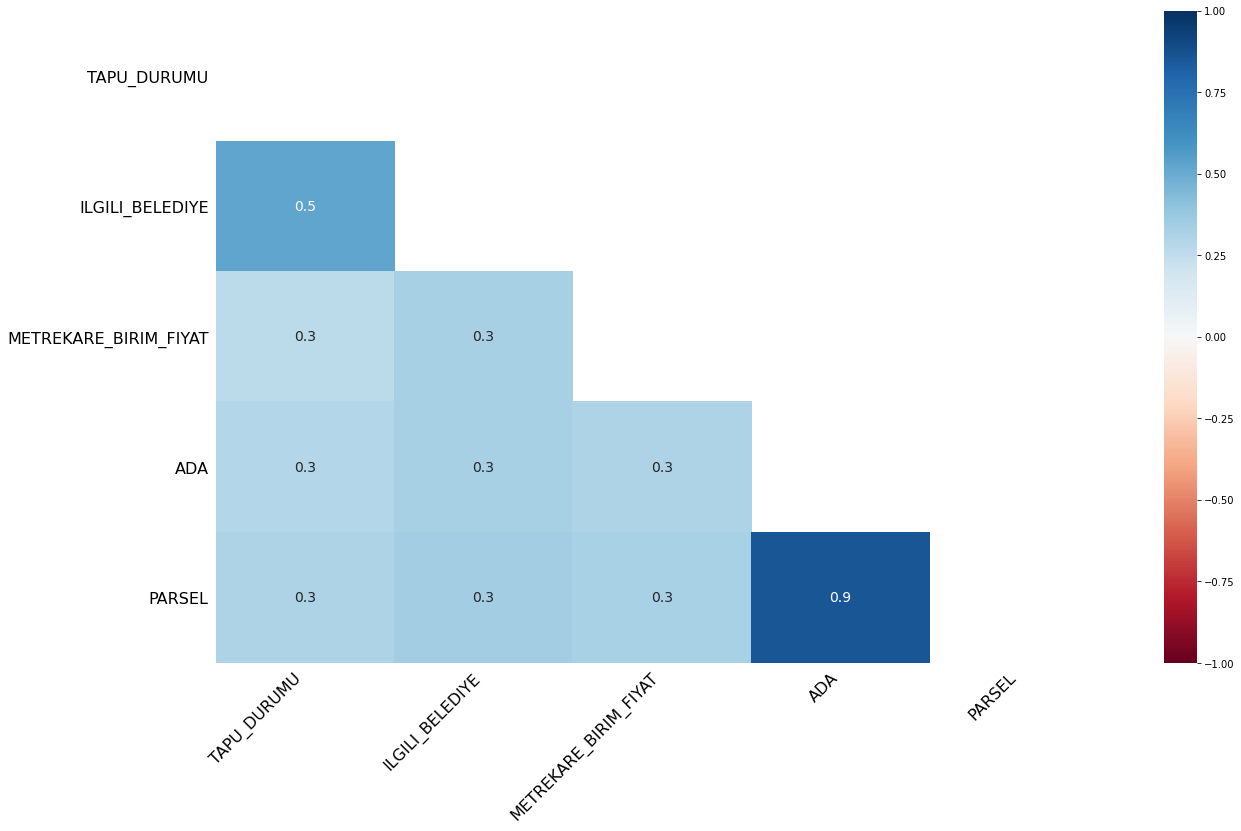

In [20]:
#ısı haritası ile eksiklik korelasyonu 
# görüldüğü üzere veriler arasında yüksek korelasyn değerleri var. Yani yapısal bir bozukluk var. Rasgele bir şekilde 
#veri silinemez ya da doldurulamaz. Özellekile ada izle parsel arasında korelasyon 0.9 aralarında yüksek korelasyon var.
msno.heatmap(df_train)

In [21]:
#kategorik değişkeldundan mode ile eksik verileri doldurduk
df_train["TAPU_DURUMU"].fillna(df_train["TAPU_DURUMU"].mode()[0],inplace=True)
df_train["TAPU_DURUMU"]

0        MUSTAKIL PARSEL
1        MUSTAKIL PARSEL
2        MUSTAKIL PARSEL
3        MUSTAKIL PARSEL
4        MUSTAKIL PARSEL
              ...       
10337       HISSELI TAPU
10338    MUSTAKIL PARSEL
10339       HISSELI TAPU
10340    MUSTAKIL PARSEL
10341    MUSTAKIL PARSEL
Name: TAPU_DURUMU, Length: 10342, dtype: object

In [22]:
#Ilce kolonuna göre Ilgili belediye deki boş alanları dolduralım. Kategorik oldukları için direk moda göre atama işlemi yapacağız
#NOT : inplace=true diyerek işlemin verisetinde kalıcı olmasını sağladık
df_train["ILGILI_BELEDIYE"].fillna(df_train["ILGILI_BELEDIYE"].mode()[0],inplace=True)
df_train["ILGILI_BELEDIYE"]

0          AYVALIK
1        YENISEHIR
2          GOLBASI
3          GOLBASI
4          GOLBASI
           ...    
10337      GOLBASI
10338      NAZILLI
10339      HACILAR
10340      GOLBASI
10341      GOLBASI
Name: ILGILI_BELEDIYE, Length: 10342, dtype: object

In [23]:
#metrekare' ye göre metrekare birim fiyatı eksik veri doldurma işlemi
df_train.groupby("METREKARE")["METREKARE_BIRIM_FIYAT"].mean()

METREKARE
1             1.0
2             NaN
11            NaN
13            NaN
14           50.0
            ...  
13758000      NaN
15000000    100.0
17815880      NaN
21312312      NaN
25000000      NaN
Name: METREKARE_BIRIM_FIYAT, Length: 3467, dtype: float64

In [24]:
df_train["METREKARE_BIRIM_FIYAT"].fillna(df_train.groupby("METREKARE")["METREKARE_BIRIM_FIYAT"].transform("mean"),inplace=True
)
df_train["METREKARE_BIRIM_FIYAT"]

0          716.333333
1           35.000000
2        96153.000000
3                 NaN
4          339.500000
             ...     
10337      130.000000
10338             NaN
10339             NaN
10340     8065.058824
10341             NaN
Name: METREKARE_BIRIM_FIYAT, Length: 10342, dtype: float64

In [25]:
df_train["METREKARE_BIRIM_FIYAT"].count()

7046

In [26]:
#Eksik kalan yerleri ortalama ile doldurduk
df_train["METREKARE_BIRIM_FIYAT"].fillna(df_train["METREKARE_BIRIM_FIYAT"].median(),inplace=True)
df_train["METREKARE_BIRIM_FIYAT"]

0          716.333333
1           35.000000
2        96153.000000
3          596.500000
4          339.500000
             ...     
10337      130.000000
10338      596.500000
10339      596.500000
10340     8065.058824
10341      596.500000
Name: METREKARE_BIRIM_FIYAT, Length: 10342, dtype: float64

In [27]:
#parsel eksik veri doldurma
#Not ada içerisinde parsel barındırır. Bu sebeple aralarında ilişki olduğundan birlikte korelasyona sokulmamalıdır. Sonuç yanlış verir
#Ben direk ada kolonunu kaldırdım
df_train = df_train.drop(["ADA"], axis = 1)


In [28]:
#Metrekareye göre Parsel deki eksik verileri dolduralım
df_train.groupby("METREKARE")["PARSEL"].mean()

METREKARE
1              0.666667
2                   NaN
11          5378.666667
13             3.000000
14          2183.000000
               ...     
13758000            NaN
15000000            NaN
17815880            NaN
21312312            NaN
25000000            NaN
Name: PARSEL, Length: 3467, dtype: float64

In [29]:
df_train["PARSEL"].fillna(df_train.groupby("METREKARE")["PARSEL"].transform("mean"),inplace=True
)
df_train["PARSEL"]

0          0.000000
1         53.000000
2               NaN
3        659.000000
4         83.000000
            ...    
10337      0.000000
10338           NaN
10339    130.000000
10340     50.352941
10341           NaN
Name: PARSEL, Length: 10342, dtype: float64

In [30]:
df_train["PARSEL"].count()

8068

In [31]:
#Kalan eksik verileri ortalama ile dolduralım
df_train["PARSEL"].fillna(df_train["PARSEL"].median(),inplace=True)
df_train["PARSEL"]

0          0.000000
1         53.000000
2         41.666667
3        659.000000
4         83.000000
            ...    
10337      0.000000
10338     41.666667
10339    130.000000
10340     50.352941
10341     41.666667
Name: PARSEL, Length: 10342, dtype: float64

Text(0.5, 1.0, 'FIYAT')

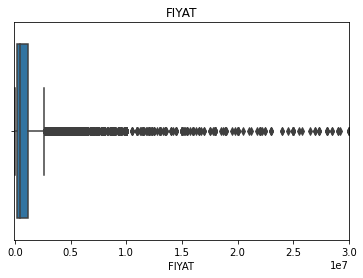

In [15]:
#Fiyat artık tespiti
#plt.figure(figsize=[25,8])
ax = sns.boxplot(x=df_train["FIYAT"])
plt.xlim([-100000,30000000])
plt.title("FIYAT")

In [54]:
a=df_train['FIYAT']>3000000
df_train[a]

,FIYAT,IL,ILCE,MAHALLE,ILAN_NO,ARSA_TIPI,METREKARE,TAPU_DURUMU,ILGILI_BELEDIYE,METREKARE_BIRIM_FIYAT,ADA,PARSEL,TAKAS_BILINMIYOR,TAKAS_EVET,TAKAS_HAYIR,KAT_KARSILIGI_EVET,KAT_KARSILIGI_HAYIR,KREDIYE_UYGUNLUK_BILINMIYOR,KREDIYE_UYGUNLUK_UYGUN,KREDIYE_UYGUNLUK_UYGUN DEGIL
2,5000000,NIGDE,MERKEZ,AKTAS (DEVLET),117875-28,I_S,52000,MUSTAKIL PARSEL,GOLBASI,96153.0,NaN,41.666667,1,0,0,0,1,1,0,0
3,6848000,NIGDE,CEYHAN,YALAK,0-35832104,TARLA,428000,MUSTAKIL PARSEL,GOLBASI,596.5,NaN,659.000000,1,0,0,0,1,1,0,0
9,7500000,AYDIN,DIDIM,FEVZIPASA,111124-4,I_T,10359,MUSTAKIL PARSEL,AYDIN DIDIM,596.5,3178.0,1.000000,0,0,1,0,1,1,0,0
18,5000000,NIGDE,MERKEZ,AKTAS (DEVLET),117875-28,I_S,52000,MUSTAKIL PARSEL,GOLBASI,96153.0,NaN,41.666667,1,0,0,0,1,1,0,0
19,6848000,ADANA,CEYHAN,YALAK,0-35832104,TARLA,428000,MUSTAKIL PARSEL,GOLBASI,596.5,NaN,659.000000,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10295,29250000,ISTANBUL,SARIYER,ZEKERIYAKOY,88289-92,I_K,8360,MUSTAKIL PARSEL,SARIYER,596.5,NaN,41.666667,1,0,0,0,1,1,0,0
10296,945600000,ISTANBUL,SILE,CAVUS,98394-174,I_K,1182,MUSTAKIL PARSEL,GOLBASI,596.5,NaN,41.666667,0,0,1,0,1,1,0,0
10306,9500000,MUGLA,BODRUM,GUNDOGAN,67324-1316,I_K,7950,MUSTAKIL PARSEL,GOLBASI,596.5,NaN,41.666667,1,0,0,0,1,1,0,0
10332,9000000,DUZCE,MERKEZ,DARICI,71095-1750,K_T,6955,MUSTAKIL PARSEL,GOLBASI,596.5,NaN,41.666667,1,0,0,0,1,1,0,0


In [108]:
buyuk=df_train['METREKARE']>24000000
df_train[buyuk]


,FIYAT,IL,ILCE,MAHALLE,ILAN_NO,ARSA_TIPI,METREKARE,TAPU_DURUMU,ILGILI_BELEDIYE,METREKARE_BIRIM_FIYAT,PARSEL,TAKAS_BILINMIYOR,TAKAS_EVET,TAKAS_HAYIR,KAT_KARSILIGI_EVET,KAT_KARSILIGI_HAYIR,KREDIYE_UYGUNLUK_BILINMIYOR,KREDIYE_UYGUNLUK_UYGUN,KREDIYE_UYGUNLUK_UYGUN DEGIL
440,8865500,MERSIN(ICEL),TOROSLAR,BULUKLU,2513-287,TARLA,25000000,MUSTAKIL PARSEL,GOLBASI,596.5,41.666667,1,0,0,0,1,1,0,0


Text(0.5, 1.0, 'METREKARE')

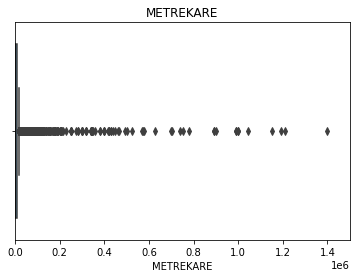

In [192]:
#METREKARE artık tespiti
#plt.figure(figsize=[10,8])
sns.boxplot(x=df_train["METREKARE"])
plt.xlim([-1000,1500000])
plt.title("METREKARE")

In [32]:
Q1=df_train["METREKARE"].quantile(0.25)
Q3=df_train["METREKARE"].quantile(0.75)
IQR=Q3-Q1

In [33]:
Q1

543.0

In [34]:
Q3

7000.0

In [35]:
IQR

6457.0

In [36]:
alt_sinir=Q1-1.5*IQR

In [37]:
ust_sinir=Q3+1.5*IQR

In [38]:
alt_sinir

-9142.5

In [39]:
ust_sinir

16685.5

In [40]:
aykiri=(df_train['METREKARE']>ust_sinir) | (df_train['METREKARE']<alt_sinir)
df_metrekare=df_train['METREKARE']
df_metrekare[aykiri]


2         52000
3        428000
18        52000
19       428000
32        27000
          ...  
10285     26000
10297     41000
10305     19300
10316     20698
10338     25150
Name: METREKARE, Length: 1102, dtype: int64

In [41]:
#aykırı verileri silerek t_metrekare adında kaydettik
#t_metrekare=df_metrekare[~((df_metrekare<(alt_sinir)) | (df_metrekare>(ust_sinir))).any(axis=1)]
df_train = df_train.loc[(df_train["METREKARE"] < ust_sinir) & (df_train["METREKARE"] > alt_sinir)]
df_train.reset_index()

,index,FIYAT,IL,ILCE,MAHALLE,ILAN_NO,ARSA_TIPI,METREKARE,TAPU_DURUMU,ILGILI_BELEDIYE,METREKARE_BIRIM_FIYAT,PARSEL,TAKAS_BILINMIYOR,TAKAS_EVET,TAKAS_HAYIR,KAT_KARSILIGI_EVET,KAT_KARSILIGI_HAYIR,KREDIYE_UYGUNLUK_BILINMIYOR,KREDIYE_UYGUNLUK_UYGUN,KREDIYE_UYGUNLUK_UYGUN DEGIL
0,0,165000,BALIKESIR,AYVALIK,ALTINOVA,42916-1540,I_K,255,MUSTAKIL PARSEL,AYVALIK,716.333333,0.000000,0,1,0,0,1,0,1,0
1,1,240000,BURSA,YENISEHIR,KOZDERE,69245-16,TARLA,7750,MUSTAKIL PARSEL,YENISEHIR,35.000000,53.000000,0,0,1,0,1,0,0,1
2,4,115000,ADIYAMAN,KAHTA,CUMHURIYET,118904-18,M_A,410,MUSTAKIL PARSEL,GOLBASI,339.500000,83.000000,1,0,0,0,1,1,0,0
3,5,77000,ADANA,ALADAG,CERITLER,119467-5,I_K,500,MUSTAKIL PARSEL,GOLBASI,5704.520833,402.016667,1,0,0,0,1,1,0,0
4,6,185000,ANKARA,AKYURT,SAMUT,26985-2054,TARLA,1410,MUSTAKIL PARSEL,AKYURT,180.000000,54.000000,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,10336,8000000,ANTALYA,KEPEZ,AVNI TOLUNAY,68524-251,TARLA,5100,MUSTAKIL PARSEL,KEPEZ,39.000000,15.428571,0,0,1,0,1,1,0,0
9236,10337,400000,ISTANBUL,ARNAVUTKOY,DURSUNKOY,113672-45,TARLA,852,HISSELI TAPU,GOLBASI,130.000000,0.000000,0,0,1,0,1,0,0,1
9237,10339,195000,KAYSERI,HACILAR,ASAGI,0-35075918,BAG,1211,HISSELI TAPU,HACILAR,596.500000,130.000000,0,0,1,0,1,1,0,0
9238,10340,175000,IZMIR,ALIAGA,FATIH,0-35919746,BAHCE,1500,MUSTAKIL PARSEL,GOLBASI,8065.058824,50.352941,1,0,0,1,0,1,0,0


In [42]:
#Fiyat Artıkları sildik
df_train = df_train.loc[(df_train["FIYAT"] < 1900000) & (df_train["FIYAT"] > 2000)] #satilik arsa fiyatları var

df_train.reset_index()

,index,FIYAT,IL,ILCE,MAHALLE,ILAN_NO,ARSA_TIPI,METREKARE,TAPU_DURUMU,ILGILI_BELEDIYE,METREKARE_BIRIM_FIYAT,PARSEL,TAKAS_BILINMIYOR,TAKAS_EVET,TAKAS_HAYIR,KAT_KARSILIGI_EVET,KAT_KARSILIGI_HAYIR,KREDIYE_UYGUNLUK_BILINMIYOR,KREDIYE_UYGUNLUK_UYGUN,KREDIYE_UYGUNLUK_UYGUN DEGIL
0,0,165000,BALIKESIR,AYVALIK,ALTINOVA,42916-1540,I_K,255,MUSTAKIL PARSEL,AYVALIK,716.333333,0.000000,0,1,0,0,1,0,1,0
1,1,240000,BURSA,YENISEHIR,KOZDERE,69245-16,TARLA,7750,MUSTAKIL PARSEL,YENISEHIR,35.000000,53.000000,0,0,1,0,1,0,0,1
2,4,115000,ADIYAMAN,KAHTA,CUMHURIYET,118904-18,M_A,410,MUSTAKIL PARSEL,GOLBASI,339.500000,83.000000,1,0,0,0,1,1,0,0
3,5,77000,ADANA,ALADAG,CERITLER,119467-5,I_K,500,MUSTAKIL PARSEL,GOLBASI,5704.520833,402.016667,1,0,0,0,1,1,0,0
4,6,185000,ANKARA,AKYURT,SAMUT,26985-2054,TARLA,1410,MUSTAKIL PARSEL,AKYURT,180.000000,54.000000,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7950,10335,215000,ANTALYA,KONYAALTI,YARBASCANDIR,110220-509,TARLA,3122,MUSTAKIL PARSEL,KONYAALTI BELEDIYE,1.000000,1.000000,0,1,0,0,1,0,1,0
7951,10337,400000,ISTANBUL,ARNAVUTKOY,DURSUNKOY,113672-45,TARLA,852,HISSELI TAPU,GOLBASI,130.000000,0.000000,0,0,1,0,1,0,0,1
7952,10339,195000,KAYSERI,HACILAR,ASAGI,0-35075918,BAG,1211,HISSELI TAPU,HACILAR,596.500000,130.000000,0,0,1,0,1,1,0,0
7953,10340,175000,IZMIR,ALIAGA,FATIH,0-35919746,BAHCE,1500,MUSTAKIL PARSEL,GOLBASI,8065.058824,50.352941,1,0,0,1,0,1,0,0


In [37]:
b=df_train["METREKARE_BIRIM_FIYAT"]<345
b

0        False
1         True
4         True
5        False
6         True
         ...  
10335     True
10337     True
10339    False
10340    False
10341    False
Name: METREKARE_BIRIM_FIYAT, Length: 7955, dtype: bool

In [167]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10342 entries, 0 to 10341
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   FIYAT                         10342 non-null  int64  
 1   IL                            10342 non-null  object 
 2   ILCE                          10342 non-null  object 
 3   MAHALLE                       10342 non-null  object 
 4   ILAN_NO                       10342 non-null  object 
 5   ARSA_TIPI                     10342 non-null  object 
 6   METREKARE                     10342 non-null  int64  
 7   TAPU_DURUMU                   10342 non-null  object 
 8   ILGILI_BELEDIYE               10342 non-null  object 
 9   METREKARE_BIRIM_FIYAT         10342 non-null  float64
 10  ADA                           3490 non-null   float64
 11  PARSEL                        10342 non-null  float64
 12  TAKAS_BILINMIYOR              10342 non-null  int64  
 13  T

In [43]:
df_train.drop(columns=["ILAN_NO","ILGILI_BELEDIYE"], inplace=True)


Text(0.5, 1.0, 'PARSEL')

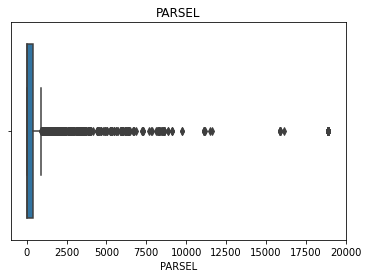

In [25]:
#PARSEL artık tespiti
#plt.figure(figsize=[10,8])
sns.boxplot(x=df_train["PARSEL"])
plt.xlim([-1000,20000.0])
plt.title("PARSEL")

In [44]:
Q1=df_train["PARSEL"].quantile(0.25)
Q3=df_train["PARSEL"].quantile(0.75)
IQR=Q3-Q1

In [45]:
Q1

7.0

In [46]:
Q3

374.9545454545455

In [47]:
IQR

367.9545454545455

In [51]:
alt_sinir=Q1-1.5*IQR

In [52]:
ust_sinir=Q3+1.5*IQR

In [53]:
alt_sinir

-544.9318181818182

In [54]:
ust_sinir

926.8863636363637

In [56]:
aykiri=(df_train['PARSEL']>ust_sinir) | (df_train['PARSEL']<alt_sinir)
df_PARSEL=df_train['PARSEL']
df_PARSEL[aykiri]

7         99999.000000
23        99999.000000
40         1324.000000
46         1321.000000
47         1568.000000
             ...      
10265      2579.000000
10277      2219.000000
10290      1366.000000
10292     15897.142857
10321    131238.000000
Name: PARSEL, Length: 1022, dtype: float64

In [57]:
df_train = df_train.loc[(df_train["PARSEL"] < ust_sinir) & (df_train["PARSEL"] > alt_sinir)]
df_train.reset_index()



,index,FIYAT,IL,ILCE,MAHALLE,ARSA_TIPI,METREKARE,TAPU_DURUMU,METREKARE_BIRIM_FIYAT,PARSEL,TAKAS_BILINMIYOR,TAKAS_EVET,TAKAS_HAYIR,KAT_KARSILIGI_EVET,KAT_KARSILIGI_HAYIR,KREDIYE_UYGUNLUK_BILINMIYOR,KREDIYE_UYGUNLUK_UYGUN,KREDIYE_UYGUNLUK_UYGUN DEGIL
0,0,165000,BALIKESIR,AYVALIK,ALTINOVA,I_K,255,MUSTAKIL PARSEL,716.333333,0.000000,0,1,0,0,1,0,1,0
1,1,240000,BURSA,YENISEHIR,KOZDERE,TARLA,7750,MUSTAKIL PARSEL,35.000000,53.000000,0,0,1,0,1,0,0,1
2,4,115000,ADIYAMAN,KAHTA,CUMHURIYET,M_A,410,MUSTAKIL PARSEL,339.500000,83.000000,1,0,0,0,1,1,0,0
3,5,77000,ADANA,ALADAG,CERITLER,I_K,500,MUSTAKIL PARSEL,5704.520833,402.016667,1,0,0,0,1,1,0,0
4,6,185000,ANKARA,AKYURT,SAMUT,TARLA,1410,MUSTAKIL PARSEL,180.000000,54.000000,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6928,10335,215000,ANTALYA,KONYAALTI,YARBASCANDIR,TARLA,3122,MUSTAKIL PARSEL,1.000000,1.000000,0,1,0,0,1,0,1,0
6929,10337,400000,ISTANBUL,ARNAVUTKOY,DURSUNKOY,TARLA,852,HISSELI TAPU,130.000000,0.000000,0,0,1,0,1,0,0,1
6930,10339,195000,KAYSERI,HACILAR,ASAGI,BAG,1211,HISSELI TAPU,596.500000,130.000000,0,0,1,0,1,1,0,0
6931,10340,175000,IZMIR,ALIAGA,FATIH,BAHCE,1500,MUSTAKIL PARSEL,8065.058824,50.352941,1,0,0,1,0,1,0,0


In [58]:
#Parsel Artıkları sildik
"""df_train = df_train.loc[(df_train["PARSEL"] < 10000) & (df_train["PARSEL"] > -1)] #satilik arsa fiyatları var

df_train.reset_index()"""

'df_train = df_train.loc[(df_train["PARSEL"] < 10000) & (df_train["PARSEL"] > -1)] #satilik arsa fiyatları var\n\ndf_train.reset_index()'

In [27]:
df_train["PARSEL"].value_counts()

41.666667      1467
1.000000        505
0.000000        447
2.000000        215
3.000000        176
               ... 
1930.000000       1
8622.000000       1
5.666667          1
6364.000000       1
2663.000000       1
Name: PARSEL, Length: 982, dtype: int64

In [29]:
#df_train_PARSEL = df_train.loc[(df_train["PARSEL"] <1) ] #satilik arsa fiyatları var
#df_train= pd.DataFrame(df_train,columns=['ARSA_TIPI'])
#df_train=df_train.drop([])
#df_train_PARSEL.reset_index()

In [34]:
#Artık parsel verileri silindi
#df_train = pd.DataFrame(df_train, columns= ['FIYAT','IL','ILCE','MAHALLE','ARSA_TIPI','METREKARE','TAPU_DURUMU','METREKARE_BIRIM_FIYAT', 'PARSEL','TAKAS_BILINMIYOR','TAKAS_EVET','TAKAS_HAYIR','KAT_KARSILIGI_EVET','KAT_KARSILIGI_HAYIR', 'KREDIYE_UYGUNLUK_BILINMIYOR','KREDIYE_UYGUNLUK_UYGUN','KREDIYE_UYGUNLUK_UYGUN DEGIL'])
#df_train = df_train.drop([8721,10265,5644,4023,926])
#df_train = df_train.drop([4989,10171,7084,6204,3394])
#df_train = df_train.drop([5224,315,7107,955,510])
#df_train = df_train.drop([7287,487,1705,1106,3208])
#df_train = df_train.drop([126,8902,240,9079,9079])

In [38]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6933 entries, 0 to 10341
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   FIYAT                         6933 non-null   int64  
 1   IL                            6933 non-null   object 
 2   ILCE                          6933 non-null   object 
 3   MAHALLE                       6933 non-null   object 
 4   ARSA_TIPI                     6933 non-null   object 
 5   METREKARE                     6933 non-null   int64  
 6   TAPU_DURUMU                   6933 non-null   object 
 7   METREKARE_BIRIM_FIYAT         6933 non-null   float64
 8   PARSEL                        6933 non-null   float64
 9   TAKAS_BILINMIYOR              6933 non-null   int64  
 10  TAKAS_EVET                    6933 non-null   int64  
 11  TAKAS_HAYIR                   6933 non-null   int64  
 12  KAT_KARSILIGI_EVET            6933 non-null   int64  
 13  KA

In [43]:
df_train_D_A_I = df_train.loc[(df_train["ARSA_TIPI"] == "D_A_I") ] #satilik arsa fiyatları var
#df_train= pd.DataFrame(df_train,columns=['ARSA_TIPI'])
#df_train=df_train.drop([])
df_train_D_A_I.reset_index()


,index,FIYAT,IL,ILCE,MAHALLE,ARSA_TIPI,METREKARE,TAPU_DURUMU,METREKARE_BIRIM_FIYAT,PARSEL,TAKAS_BILINMIYOR,TAKAS_EVET,TAKAS_HAYIR,KAT_KARSILIGI_EVET,KAT_KARSILIGI_HAYIR,KREDIYE_UYGUNLUK_BILINMIYOR,KREDIYE_UYGUNLUK_UYGUN,KREDIYE_UYGUNLUK_UYGUN DEGIL


In [42]:
df_train_OKUL = df_train.loc[(df_train["ARSA_TIPI"] == "OKUL") ] #satilik arsa fiyatları var
#df_train= pd.DataFrame(df_train,columns=['ARSA_TIPI'])
#df_train=df_train.drop([])
df_train_OKUL.reset_index()


,index,FIYAT,IL,ILCE,MAHALLE,ARSA_TIPI,METREKARE,TAPU_DURUMU,METREKARE_BIRIM_FIYAT,PARSEL,TAKAS_BILINMIYOR,TAKAS_EVET,TAKAS_HAYIR,KAT_KARSILIGI_EVET,KAT_KARSILIGI_HAYIR,KREDIYE_UYGUNLUK_BILINMIYOR,KREDIYE_UYGUNLUK_UYGUN,KREDIYE_UYGUNLUK_UYGUN DEGIL


In [52]:
df_train_T_K = df_train.loc[(df_train["ARSA_TIPI"] == "T_K") ] #satilik arsa fiyatları var

df_train_T_K.reset_index()

,index,FIYAT,IL,ILCE,MAHALLE,ARSA_TIPI,METREKARE,TAPU_DURUMU,METREKARE_BIRIM_FIYAT,PARSEL,TAKAS_BILINMIYOR,TAKAS_EVET,TAKAS_HAYIR,KAT_KARSILIGI_EVET,KAT_KARSILIGI_HAYIR,KREDIYE_UYGUNLUK_BILINMIYOR,KREDIYE_UYGUNLUK_UYGUN,KREDIYE_UYGUNLUK_UYGUN DEGIL


In [47]:
df_train_S_A = df_train.loc[(df_train["ARSA_TIPI"] == "S_A") ] #satilik arsa fiyatları var

df_train_S_A.reset_index()

,index,FIYAT,IL,ILCE,MAHALLE,ARSA_TIPI,METREKARE,TAPU_DURUMU,METREKARE_BIRIM_FIYAT,PARSEL,TAKAS_BILINMIYOR,TAKAS_EVET,TAKAS_HAYIR,KAT_KARSILIGI_EVET,KAT_KARSILIGI_HAYIR,KREDIYE_UYGUNLUK_BILINMIYOR,KREDIYE_UYGUNLUK_UYGUN,KREDIYE_UYGUNLUK_UYGUN DEGIL


In [62]:
#df_train.loc[(df_train["ARSA_TIPI"].value_counts()<20)]
#a=df_train["ARSA_TIPI"].value_counts() < 20
#df_train[a]
df_train = pd.DataFrame(df_train, columns= ['FIYAT','IL','ILCE','MAHALLE','ARSA_TIPI','METREKARE','TAPU_DURUMU','METREKARE_BIRIM_FIYAT', 'PARSEL','TAKAS_BILINMIYOR','TAKAS_EVET','TAKAS_HAYIR','KAT_KARSILIGI_EVET','KAT_KARSILIGI_HAYIR', 'KREDIYE_UYGUNLUK_BILINMIYOR','KREDIYE_UYGUNLUK_UYGUN','KREDIYE_UYGUNLUK_UYGUN DEGIL']) 
"""Parsel artık veri silinmeden önceki silinmesi gereken indeksler"""
#df_train = df_train.drop([6365,660,1822,3828,4510,6552,4820,7288,7304,100,973,2271, 3909,2615,3955,7732,6944,7057])#df_train = df_train.drop([4892,1190,1505,1917,1920,3615,3398,4135,6199,6457,6664,7291])
#df_train = df_train.drop([142,807,1261,3894,3529,4766,5582,6380,7657])#df_train = df_train.drop([745,1740,2000,3039,2227,5359,5441,5959])#df_train = df_train.drop([1267])
"""parsel artık veri silindikten sonra silinmesi gereken artık veri indeksleri"""
#df_train = df_train.drop([1550,1968,2496,2500,4419,4691,5376,8041,8668,9500])#df_train = df_train.drop([493,1357,2887,3406,3647,5524,5534])
#df_train = df_train.drop([74,726,1699,1957,2181,2984,5271,5353,5862])#df_train = df_train.drop([4790,137,784,1234,3457,3817,4674,6263,7516])
"""Parsel artık verilerinin Q1 Q2 değerleri belirtilerek silindikten sonraki indeksler"""
#df_train = df_train.drop([184,1668,4591,5061,7246,8306,9999,660,3828,4510,4820,7304])
#df_train = df_train.drop([5200,4748,4679,2664,1953,1757,1532,645])
df_train = df_train.drop([6348,5792,5396,3154,1315,1677,1674,1035])

df_train = df_train.reset_index(drop=True)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6905 entries, 0 to 6904
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   FIYAT                         6905 non-null   int64  
 1   IL                            6905 non-null   object 
 2   ILCE                          6905 non-null   object 
 3   MAHALLE                       6905 non-null   object 
 4   ARSA_TIPI                     6905 non-null   object 
 5   METREKARE                     6905 non-null   int64  
 6   TAPU_DURUMU                   6905 non-null   object 
 7   METREKARE_BIRIM_FIYAT         6905 non-null   float64
 8   PARSEL                        6905 non-null   float64
 9   TAKAS_BILINMIYOR              6905 non-null   int64  
 10  TAKAS_EVET                    6905 non-null   int64  
 11  TAKAS_HAYIR                   6905 non-null   int64  
 12  KAT_KARSILIGI_EVET            6905 non-null   int64  
 13  KAT

In [63]:
df_train.to_csv("guncel_data.csv")

In [4]:
df_train = pd.read_csv('/home/melek/PycharmProjects/webCrawl/guncel_data.csv', encoding = "UTF-8", sep=",")
df=df_train.copy()
df=df.iloc[:,1:len(df)]
df.head()

,FIYAT,IL,ILCE,MAHALLE,ARSA_TIPI,METREKARE,TAPU_DURUMU,METREKARE_BIRIM_FIYAT,PARSEL,TAKAS_BILINMIYOR,TAKAS_EVET,TAKAS_HAYIR,KAT_KARSILIGI_EVET,KAT_KARSILIGI_HAYIR,KREDIYE_UYGUNLUK_BILINMIYOR,KREDIYE_UYGUNLUK_UYGUN,KREDIYE_UYGUNLUK_UYGUN DEGIL
0,165000,BALIKESIR,AYVALIK,ALTINOVA,I_K,255,MUSTAKIL PARSEL,716.333333,0.000000,0,1,0,0,1,0,1,0
1,240000,BURSA,YENISEHIR,KOZDERE,TARLA,7750,MUSTAKIL PARSEL,35.000000,53.000000,0,0,1,0,1,0,0,1
2,115000,ADIYAMAN,KAHTA,CUMHURIYET,M_A,410,MUSTAKIL PARSEL,339.500000,83.000000,1,0,0,0,1,1,0,0
3,77000,ADANA,ALADAG,CERITLER,I_K,500,MUSTAKIL PARSEL,5704.520833,402.016667,1,0,0,0,1,1,0,0
4,185000,ANKARA,AKYURT,SAMUT,TARLA,1410,MUSTAKIL PARSEL,180.000000,54.000000,0,1,0,0,1,1,0,0


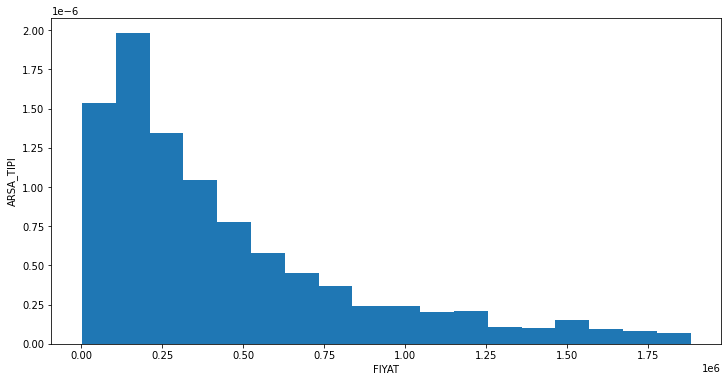

In [3]:
#Sağa çarpık (pozitif kayışlı) dağılımlar, mod'un medyandan, medyanın da aritmetik ortalamadan küçük olduğu dağılımlardır
#Öğrenme düzeyi düşüktür. Test başarısızdır
# fiyat dağılımı
plt.figure(figsize=[12,6])
df_train["FIYAT"].plot.hist(density=True, bins = 18)
plt.xlabel("FIYAT")
plt.ylabel("ARSA_TIPI")

plt.show()

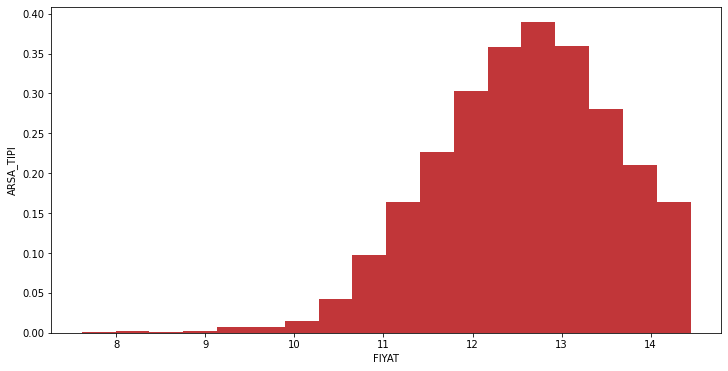

In [5]:
#Fiyat dağılımı
#Hedef değişkenine Logaritmik dönüşüm uygulanarak düzeltildi
plt.figure(figsize=[12,6])
np.log(df_train["FIYAT"]).plot.hist(density=True, bins = 18)
plt.xlabel("FIYAT")
plt.ylabel("ARSA_TIPI")

plt.show()

In [6]:

df["FIYAT"] = np.log(df["FIYAT"])

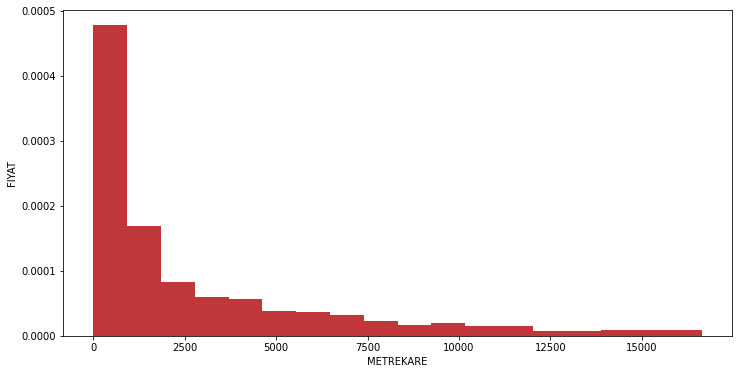

In [7]:
plt.figure(figsize=[12,6])
df_train["METREKARE"].plot.hist(density=True, bins = 18)
plt.xlabel("METREKARE")
plt.ylabel("FIYAT")
#plt.savefig("aracyasdagılımı.jpeg", dpi = 500)
plt.show()

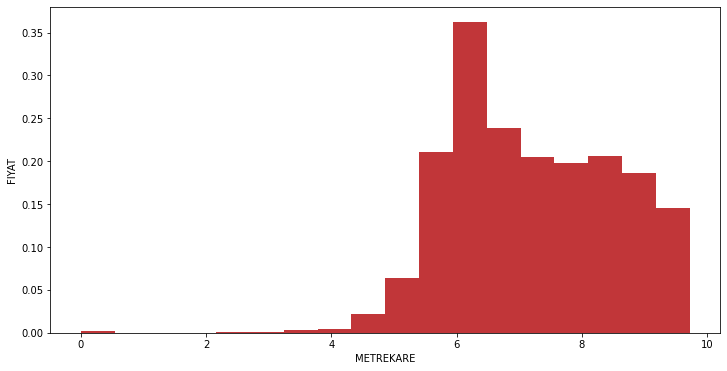

In [8]:
#Hedef değişkenine Logaritmik dönüşüm uygulanarak düzeltildi
plt.figure(figsize=[12,6])
np.log(df_train["METREKARE"]).plot.hist(density=True, bins = 18)
plt.xlabel("METREKARE")
plt.ylabel("FIYAT")
#plt.savefig("aracyasdagılımı.jpeg", dpi = 500)
plt.show()

In [9]:

df["METREKARE"] = np.log(df["METREKARE"])

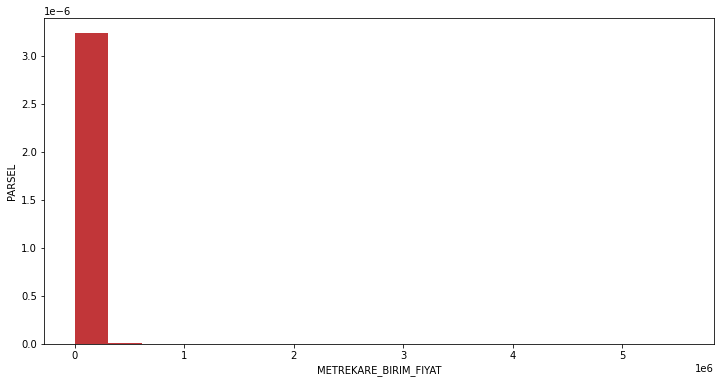

In [10]:
plt.figure(figsize=[12,6])
df_train["METREKARE_BIRIM_FIYAT"].plot.hist(density=True, bins = 18)
plt.xlabel("METREKARE_BIRIM_FIYAT")
plt.ylabel("PARSEL")

plt.show()

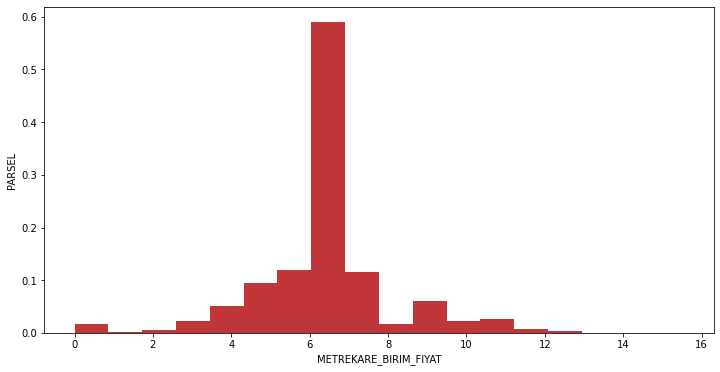

In [11]:
plt.figure(figsize=[12,6])
np.log(df_train["METREKARE_BIRIM_FIYAT"]).plot.hist(density=True, bins = 18)
plt.xlabel("METREKARE_BIRIM_FIYAT")
plt.ylabel("PARSEL")

plt.show()

In [12]:
df["METREKARE_BIRIM_FIYAT"] = np.log(df["METREKARE_BIRIM_FIYAT"])

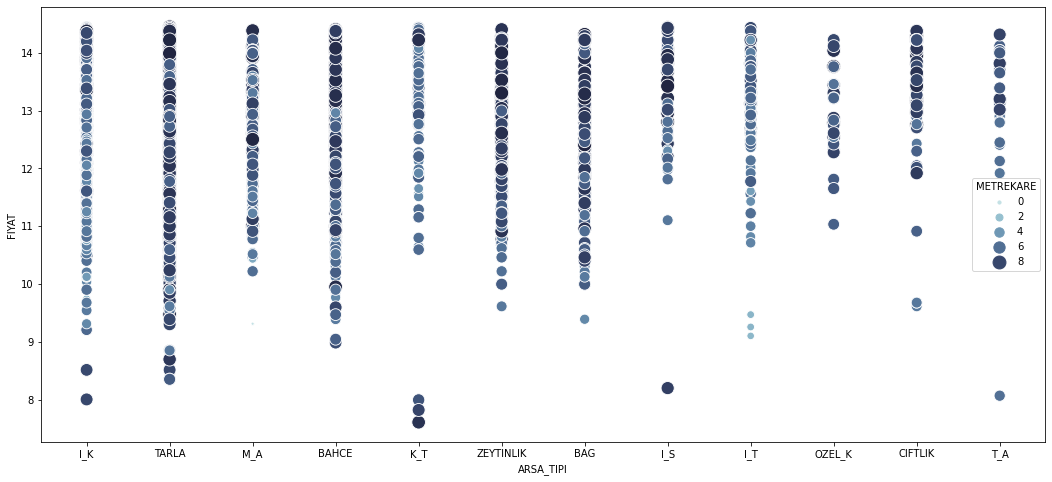

In [13]:
plt.figure(figsize=(18,8))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="ARSA_TIPI", y="FIYAT",
                     hue="METREKARE", size ="METREKARE",
                     palette=cmap, sizes=(10, 200),
                     data=df)
plt.xlabel("ARSA_TIPI")
plt.ylabel("FIYAT")
#plt.savefig("Kilometre.jpeg", dpi = 500)
plt.show()

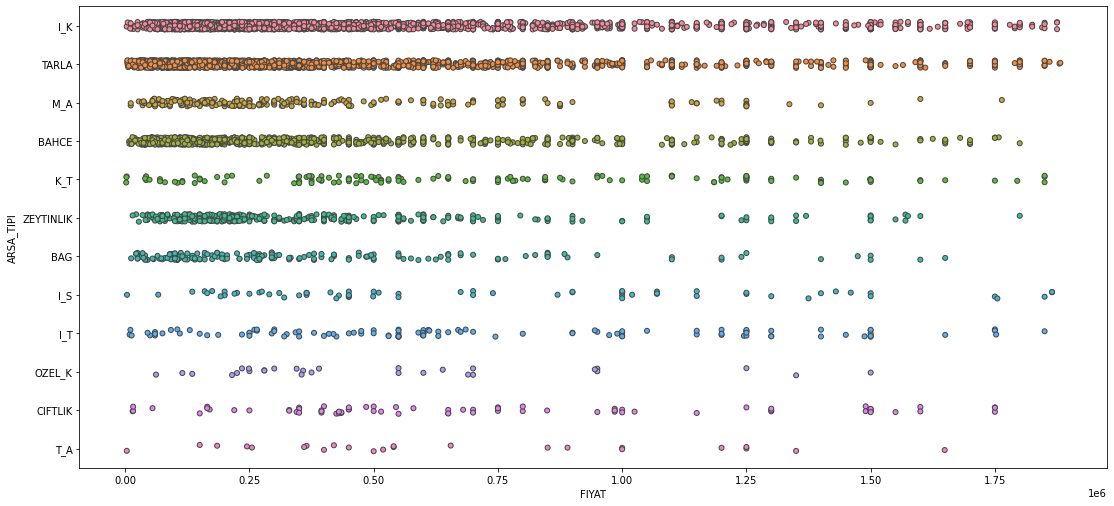

In [58]:
fig, ax = plt.subplots(figsize=[15,7])
plt.tight_layout() 
a=sns.stripplot(x ="FIYAT", y ="ARSA_TIPI", jitter=True, linewidth=1,data=df)

plt.xlabel("FIYAT")
plt.ylabel("ARSA_TIPI")
plt.savefig("Arsa_fiyat.jpeg", bbox_inches = "tight")
plt.show()

In [46]:
#df_train.corr()

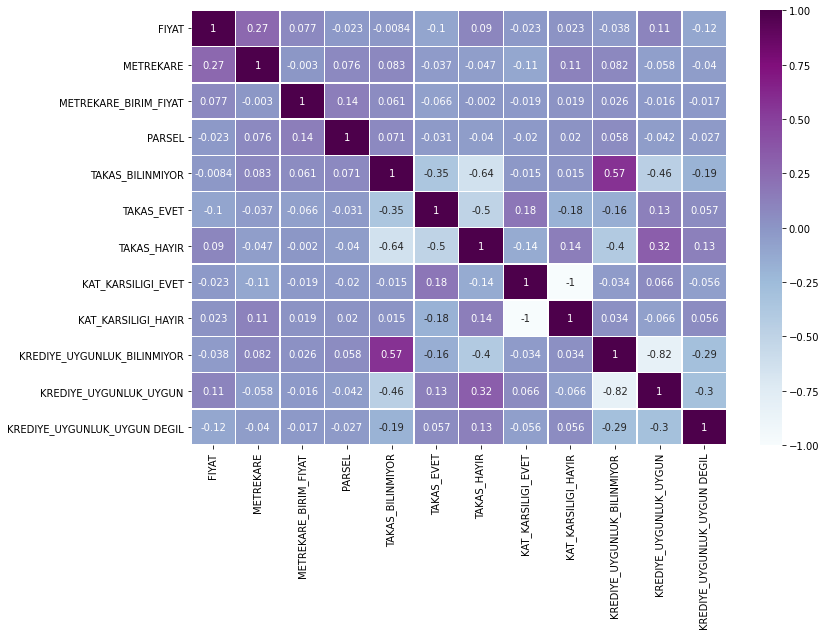

In [14]:

plt.figure(figsize=(12,8))
sns.set_palette("RdBu")
sns.heatmap(df.corr(),linewidths=.5, annot=True, cmap='BuPu');
plt.yticks(rotation=360)
#plt.savefig("heatcorr.jpeg", dpi = 600)
plt.show()

In [ ]:
#sns.jointplot(x="METREKARE_BIRIM_FIYAT",y="PARSEL",data=df_train, kind="reg")

In [ ]:
#df_ilk30 = df_train.loc[(df_train["FIYAT"] < 600000)] #satilik arsa fiyatları var
#df_ilk30.info()


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
FIYAT,6905.0,12.581655,1.000031,7.612337,11.918391,12.644328,13.304685,1.444770e+01
METREKARE,6905.0,7.200937,1.313288,0.000000,6.200509,7.064759,8.296297,9.719745e+00
METREKARE_BIRIM_FIYAT,6905.0,5784.080000,78540.392888,1.000000,368.000000,596.500000,865.000000,5.555866e+06
PARSEL,6905.0,121.399906,199.296696,0.000000,5.000000,41.666667,118.000000,9.248750e+02
TAKAS_BILINMIYOR,6905.0,0.311948,0.463322,0.000000,0.000000,0.000000,1.000000,1.000000e+00
TAKAS_EVET,6905.0,0.215062,0.410895,0.000000,0.000000,0.000000,0.000000,1.000000e+00
TAKAS_HAYIR,6905.0,0.472991,0.499306,0.000000,0.000000,0.000000,1.000000,1.000000e+00
KAT_KARSILIGI_EVET,6905.0,0.087618,0.282759,0.000000,0.000000,0.000000,0.000000,1.000000e+00
KAT_KARSILIGI_HAYIR,6905.0,0.912382,0.282759,0.000000,1.000000,1.000000,1.000000,1.000000e+00
KREDIYE_UYGUNLUK_BILINMIYOR,6905.0,0.440840,0.496524,0.000000,0.000000,0.000000,1.000000,1.000000e+00


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6905 entries, 0 to 6904
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   FIYAT                         6905 non-null   float64
 1   IL                            6905 non-null   object 
 2   ILCE                          6905 non-null   object 
 3   MAHALLE                       6905 non-null   object 
 4   METREKARE                     6905 non-null   float64
 5   TAPU_DURUMU                   6905 non-null   object 
 6   METREKARE_BIRIM_FIYAT         6905 non-null   float64
 7   PARSEL                        6905 non-null   float64
 8   TAKAS_BILINMIYOR              6905 non-null   int64  
 9   TAKAS_EVET                    6905 non-null   int64  
 10  TAKAS_HAYIR                   6905 non-null   int64  
 11  KAT_KARSILIGI_EVET            6905 non-null   int64  
 12  KAT_KARSILIGI_HAYIR           6905 non-null   int64  
 13  KRE

In [66]:
cols = ('FIYAT','IL','ILCE','MAHALLE','ARSA_TIPI','METREKARE','TAPU_DURUMU','METREKARE_BIRIM_FIYAT','PARSEL','TAKAS_BILINMIYOR',
        'TAKAS_EVET','TAKAS_HAYIR','KAT_KARSILIGI_EVET','KAT_KARSILIGI_HAYIR','KREDIYE_UYGUNLUK_BILINMIYOR','KREDIYE_UYGUNLUK_UYGUN','KREDIYE_UYGUNLUK_UYGUN DEGIL')

In [15]:
df=pd.get_dummies(df,columns=["ARSA_TIPI"],prefix=["ARSA_TIPI"])




In [ ]:
df["ARSA_TIPI_BAG"] = df["ARSA_TIPI_BAG"].astype(int)
df["ARSA_TIPI_BAHCE"] = df["ARSA_TIPI_BAHCE"].astype(int)
df["ARSA_TIPI_ZEYTINLIK"] = df["ARSA_TIPI_ZEYTINLIK"].astype(int)
df["ARSA_TIPI_T_A"] = df["ARSA_TIPI_T_A"].astype(int)
df["ARSA_TIPI_TARLA"] = df["ARSA_TIPI_TARLA"].astype(int)
df["ARSA_TIPI_OZEL_K"] = df["ARSA_TIPI_OZEL_K"].astype(int)
df["ARSA_TIPI_M_A"] = df["ARSA_TIPI_M_A"].astype(int)
df["ARSA_TIPI_K_T"] = df["ARSA_TIPI_K_T"].astype(int)
df["ARSA_TIPI_I_T"] = df["ARSA_TIPI_I_T"].astype(int)
df["ARSA_TIPI_I_S"] = df["ARSA_TIPI_I_S"].astype(int)
df["ARSA_TIPI_I_K"] = df["ARSA_TIPI_I_K"].astype(int)
df["ARSA_TIPI_CIFTLIK"] = df["ARSA_TIPI_CIFTLIK"].astype(int)

In [ ]:

plt.figure(figsize=(12,8))
sns.set_palette("RdBu")
sns.heatmap(df.corr(),linewidths=.5, annot=True, cmap='BuPu');
plt.yticks(rotation=360)
#plt.savefig("heatcorr.jpeg", dpi = 600)
plt.show()

In [16]:
"""from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(df[c].values))
    df[c] = lbl.transform(list(df[c].values))"""

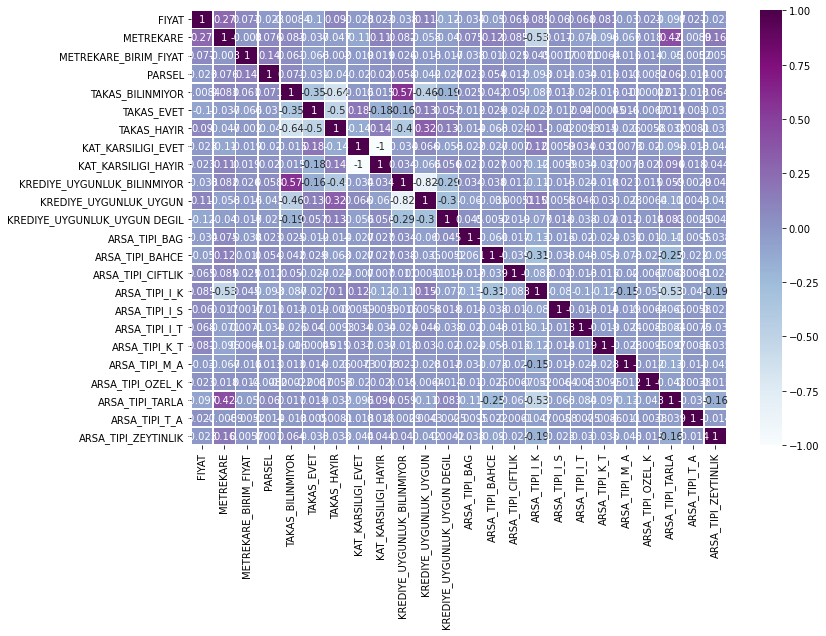

In [17]:

plt.figure(figsize=(12,8))
sns.set_palette("RdBu")
sns.heatmap(df.corr(),linewidths=.5, annot=True, cmap='BuPu');
plt.yticks(rotation=360)
#plt.savefig("heatcorr.jpeg", dpi = 600)
plt.show()

In [208]:
"""from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(df[c].values))
    df[c] = lbl.transform(list(df[c].values))"""

In [70]:
#df=pd.get_dummies(df,columns=["TAPU_DURUMU"],prefix=["TAPU_DURUMU"])

In [72]:
#df["TAPU_DURUMU_ARSA"] = df["TAPU_DURUMU_ARSA"].astype(int)
#df["TAPU_DURUMU_BILINMIYOR"] = df["TAPU_DURUMU_BILINMIYOR"].astype(int)
#df["TAPU_DURUMU_HISSELI TAPU"] = df["TAPU_DURUMU_HISSELI TAPU"].astype(int)
#df["TAPU_DURUMU_KAT MULKIYETI"] = df["TAPU_DURUMU_KAT MULKIYETI"].astype(int)
#df["TAPU_DURUMU_MUSTAKIL PARSEL"] = df["TAPU_DURUMU_MUSTAKIL PARSEL"].astype(int)
#df["TAPU_DURUMU_TAHSIS"] = df["TAPU_DURUMU_TAHSIS"].astype(int)
#df["TAPU_DURUMU_ZILLIYET"] = df["TAPU_DURUMU_ZILLIYET"].astype(int)

In [73]:
df.head()

,FIYAT,IL,ILCE,MAHALLE,METREKARE,METREKARE_BIRIM_FIYAT,PARSEL,TAKAS_BILINMIYOR,TAKAS_EVET,TAKAS_HAYIR,...,ARSA_TIPI_TARLA,ARSA_TIPI_T_A,ARSA_TIPI_ZEYTINLIK,TAPU_DURUMU_ARSA,TAPU_DURUMU_BILINMIYOR,TAPU_DURUMU_HISSELI TAPU,TAPU_DURUMU_KAT MULKIYETI,TAPU_DURUMU_MUSTAKIL PARSEL,TAPU_DURUMU_TAHSIS,TAPU_DURUMU_ZILLIYET
0,165000,BALIKESIR,AYVALIK,ALTINOVA,255,716.333333,0.000000,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,240000,BURSA,YENISEHIR,KOZDERE,7750,35.000000,53.000000,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,115000,ADIYAMAN,KAHTA,CUMHURIYET,410,339.500000,83.000000,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,77000,ADANA,ALADAG,CERITLER,500,5704.520833,402.016667,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,185000,ANKARA,AKYURT,SAMUT,1410,180.000000,54.000000,0,1,0,...,1,0,0,0,0,0,0,1,0,0


önce  feature selection:23 features sayısı.


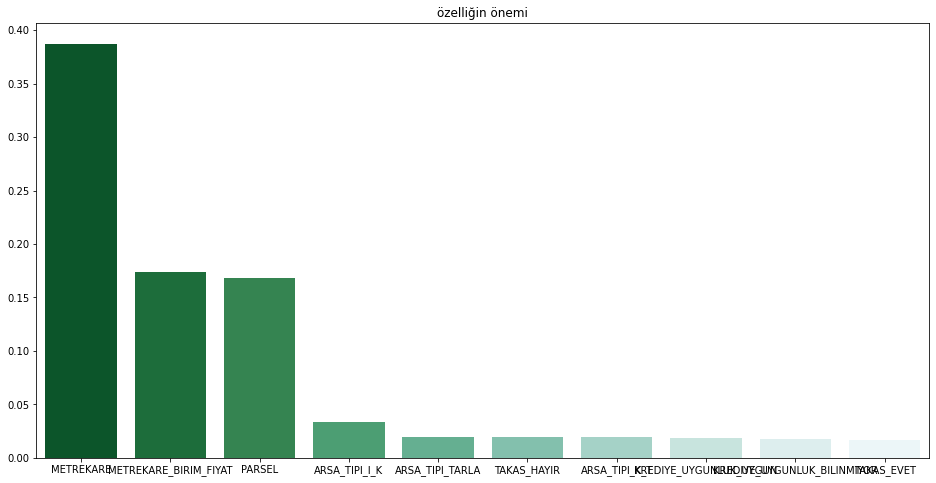

In [20]:

# Özelliği Önem kontrolü
# Özellik seçimi için extra tree classifier'ı kullanıldı.
from sklearn.ensemble import ExtraTreesRegressor
target = df['FIYAT']
features = df.drop(columns = ['FIYAT'])
# sadece sayısal özellikler için mümkün, bu yüzden burada sadece sayısal kullan
non_obj_features = features.describe(exclude = np.object).columns
features = features[non_obj_features]
beforefs = features.columns
print("önce  feature selection:{} features sayısı.".format(len(non_obj_features)))
#classifer for feature selection oluşturulur
forest  = ExtraTreesRegressor(n_estimators = 50)
forest = forest.fit(features, target)
importance_table = pd.Series(forest.feature_importances_, index=features.columns)
importance_table = importance_table.sort_values(ascending = False)
plt.figure(figsize=(16,8))
ax = sns.barplot(x = importance_table.index[:10], y = importance_table.values[:10], palette="BuGn_r")
ax.set_title('özelliğin önemi')
#features: özellik
select_feature = importance_table.index[:10]
#importance_table





In [16]:
select_feature 

Index(['KREDIYE_UYGUNLUK_UYGUN DEGIL', 'TAKAS_HAYIR', 'ARSA_TIPI_TARLA',
       'ARSA_TIPI_K_T', 'KAT_KARSILIGI_HAYIR', 'KAT_KARSILIGI_EVET',
       'ARSA_TIPI_I_T', 'TAKAS_EVET', 'KREDIYE_UYGUNLUK_BILINMIYOR',
       'ARSA_TIPI_CIFTLIK'],
      dtype='object')

/home/melek/PycharmProjects/webCrawl/venv/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/melek/PycharmProjects/webCrawl/venv/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/melek/PycharmProjects/webCrawl/venv/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displ

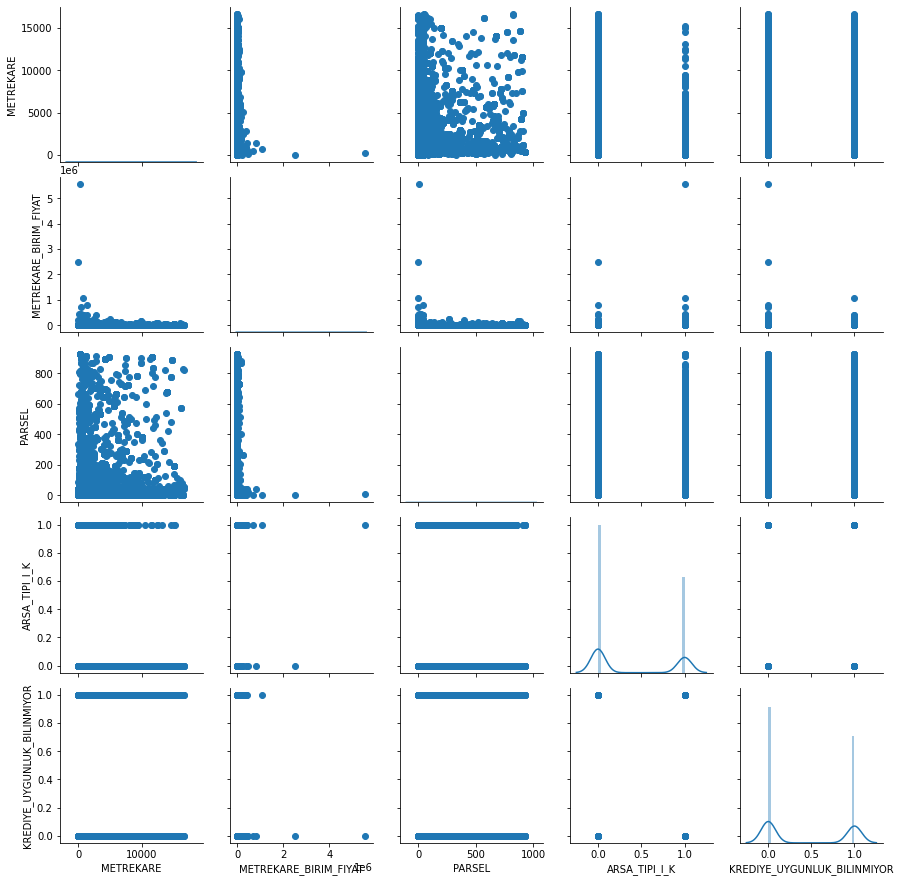

In [76]:
#Regressionda en önemli 10 özelliği seçtik
fig = sns.PairGrid(df[select_feature[0:5]])
fig.map_offdiag(plt.scatter)
fig.map_diag(sns.distplot, bins=30)

/home/melek/PycharmProjects/webCrawl/venv/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/melek/PycharmProjects/webCrawl/venv/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/melek/PycharmProjects/webCrawl/venv/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displ

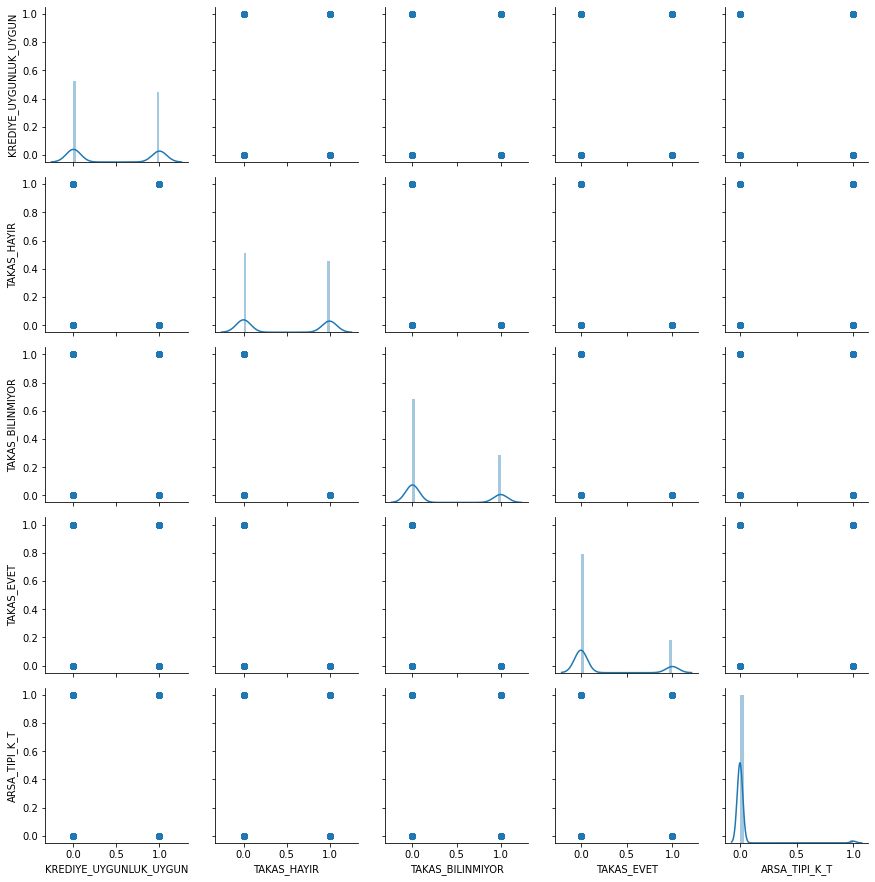

In [77]:
#Başka iki özelliğin seçtiği ikinci beşe geçelim.
fig = sns.PairGrid(df[select_feature[5:]])
fig.map_offdiag(plt.scatter)
fig.map_diag(sns.distplot, bins=30);


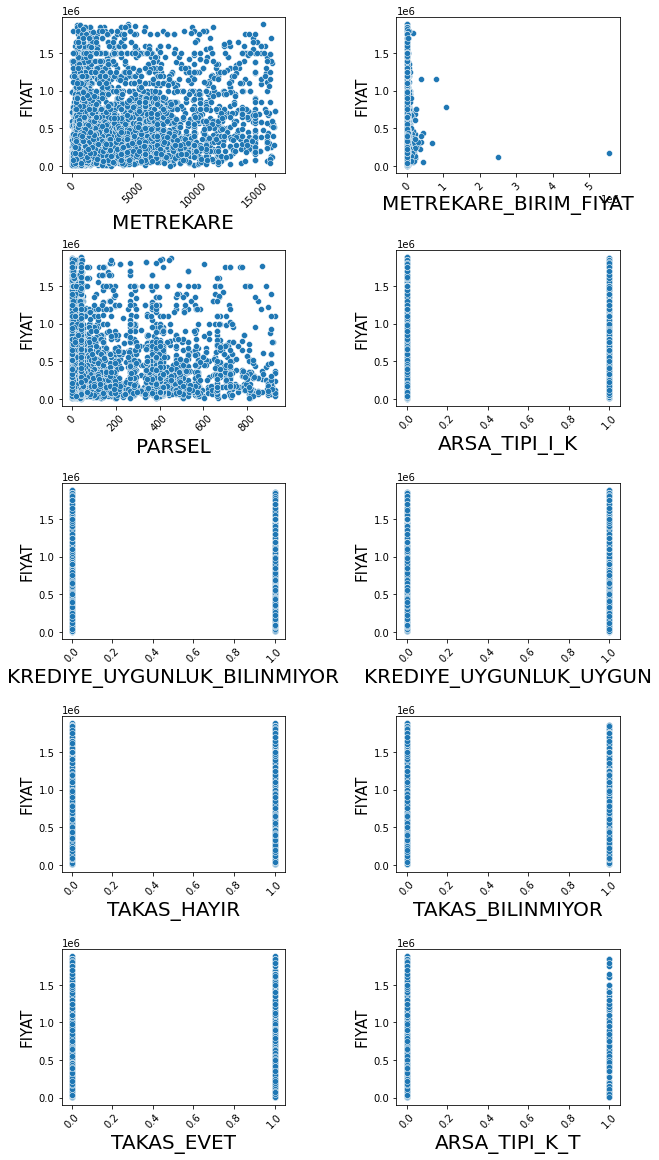

In [78]:
# 1. satış fiyatı ile seçilen 10 özellik arasındaki korelasyon fig = plt.figure(figsize=(10,20))
fig = plt.figure(figsize=(10,20))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(1, 11):
    ax = fig.add_subplot(5, 2, i)
    g = sns.scatterplot(x = df[select_feature[i-1]], y="FIYAT", data=df)
    g.set_xlabel(g.get_xlabel(),fontsize= 20)
    g.set_ylabel(g.get_ylabel(),fontsize= 15)
    plt.xticks(rotation=45)


In [ ]:
df["ARSA_TIPI_BAG"] = df[""].astype(int)
df["ARSA_TIPI_BAHCE"] = df[""].astype(int)
df["ARSA_TIPI_ZEYTINLIK"] = df[""].astype(int)
df["ARSA_TIPI_T_A"] = df[""].astype(int)

df["ARSA_TIPI_OZEL_K"] = df[""].astype(int)
df["ARSA_TIPI_M_A"] = df[""].astype(int)

df["ARSA_TIPI_I_T"] = df[""].astype(int)
df["ARSA_TIPI_I_S"] = df[""].astype(int)

df["ARSA_TIPI_CIFTLIK"] = df[""].astype(int)

In [ ]:
#'METREKARE', 'METREKARE_BIRIM_FIYAT', 'PARSEL', 'ARSA_TIPI_I_K' select feature den çıkarıldığında
Index(['ARSA_TIPI_K_T', 'ARSA_TIPI_I_T', 'TAPU_DURUMU_HISSELI TAPU',
       'ARSA_TIPI_I_S', 'KREDIYE_UYGUNLUK_UYGUN DEGIL', 'ARSA_TIPI_CIFTLIK',
       'TAKAS_HAYIR', 'KREDIYE_UYGUNLUK_UYGUN', 'KAT_KARSILIGI_EVET',
       'KAT_KARSILIGI_HAYIR'],
      dtype='object')

In [23]:
#model seçimi -Numeric kolonlar ile OLS uyguladık
X = df.drop(columns=["FIYAT","IL","ILCE","MAHALLE","TAPU_DURUMU"]).astype(float)
y = df.loc[:,"FIYAT"].astype(float)
model = sm.OLS(y, X, data=df)
results = model.fit()
results.summary()
#,"ARSA_TIPI_T_A","ARSA_TIPI_M_A","ARSA_TIPI_OZEL_K","ARSA_TIPI_ZEYTINLIK","ARSA_TIPI_BAG","ARSA_TIPI_BAHCE","KREDIYE_UYGUNLUK_UYGUN DEGIL","TAKAS_BILINMIYOR"

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  FIYAT   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     105.6
Date:                Wed, 25 Nov 2020   Prob (F-statistic):               0.00
Time:                        11:51:53   Log-Likelihood:                -8914.5
No. Observations:                6905   AIC:                         1.787e+04
Df Residuals:                    6885   BIC:                         1.801e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
METREKARE                        0.3906      0.010     38.356      0.000       0.371       0.411
METREKARE_BIRIM_FIYAT        -1.823e-08   1.35e-07     -0.135      0.893   -2.83e-07    2.47e-07
PARSEL                       -8.445e-05   5.37e-05     -1.573      0.116      -0.000    2.08e-05
TAKAS_BILINMIYOR                 2.6532      0.029     90.580      0.000       2.596       2.711
TAKAS_EVET                       2.5063      0.027     91.703      0.000       2.453       2.560
TAKAS_HAYIR                      2.7197      0.026    102.797      0.000       2.668       2.772
KAT_KARSILIGI_EVET               3.9113      0.040     97.499      0.000       3.833       3.990
KAT_KARSILIGI_HAYIR              3.9679      0.034    115.073      0.000       3.900       4.036
KREDIYE_UYGUNLUK_BILINMIYOR      2.6419      0.028     93.067      0.000       2.586       2.698
KREDIYE_UYGUNLUK_UYGUN           2.7352      0.028     98.984      0.000       2.681       2.789
KREDIYE_UYGUNLUK_UYGUN DEGIL     2.5022      0.033     75.397      0.000       2.437       2.567
ARSA_TIPI_BAG                    0.0676      0.067      1.004      0.315      -0.064       0.200
ARSA_TIPI_BAHCE                  0.2151      0.038      5.627      0.000       0.140       0.290
ARSA_TIPI_CIFTLIK                0.6848      0.099      6.896      0.000       0.490       0.879
ARSA_TIPI_I_K                    0.9136      0.030     30.233      0.000       0.854       0.973
ARSA_TIPI_I_S                    1.0099      0.102      9.867      0.000       0.809       1.211
ARSA_TIPI_I_T                    1.3001      0.082     15.935      0.000       1.140       1.460
ARSA_TIPI_K_T                    1.3626      0.072     18.899      0.000       1.221       1.504
ARSA_TIPI_M_A                    0.5379      0.058      9.323      0.000       0.425       0.651
ARSA_TIPI_OZEL_K                 0.6847      0.153      4.483      0.000       0.385       0.984
ARSA_TIPI_TARLA                  0.0309      0.033      0.925      0.355      -0.035       0.096
ARSA_TIPI_T_A                    1.0151      0.167      6.067      0.000       0.687       1.343
ARSA_TIPI_ZEYTINLIK              0.0571      0.051      1.119      0.263      -0.043       0.157
==============================================================================
Omnibus:                      542.508   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1468.608
Skew:                          -0.441   Prob(JB):                         0.00
Kurtosis:                       5.080   Cond. No.                     1.26e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctl

In [315]:
"""objectcol = ('FIYAT','IL','ILCE','MAHALLE','ARSA_TIPI','METREKARE','TAPU_DURUMU','METREKARE_BIRIM_FIYAT','PARSEL','TAKAS_BILINMIYOR',
        'TAKAS_EVET','TAKAS_HAYIR','KAT_KARSILIGI_EVET','KAT_KARSILIGI_HAYIR','KREDIYE_UYGUNLUK_BILINMIYOR','KREDIYE_UYGUNLUK_UYGUN','KREDIYE_UYGUNLUK_UYGUN DEGIL')"""

In [43]:
def get_model(X,y):
    
#    X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df_train.index, test_size=0.33, random_state=0)
    
    #test setini ayırdık
    X, X_test, y, y_test = train_test_split(X, y, test_size = .25, random_state = 42)
    
    #train val ayırdık
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = .2, random_state = 42)
    
    #LinearReg
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    print(f'Linear Regression train R^2: {lm.score(X_train, y_train):.3f}')
    print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')
    print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')
    
    #Poly
    poly = PolynomialFeatures(degree=2) 
    X_train_poly = poly.fit_transform(X_train.values)
    X_val_poly = poly.transform(X_val.values)
    X_test_poly = poly.transform(X_test.values)
    lm_poly = LinearRegression()
    
    lm_poly.fit(X_train_poly, y_train)
    print(f'Degree 2 polynomial regression train R^2: {lm_poly.score(X_train_poly, y_train):.3f}')
    print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')
    print(f'Degree 2 polynomial regression test R^2: {lm_poly.score(X_test_poly, y_test):.3f}')
    
    #PolyRidge
    lm_poly_ri = Ridge(alpha=0.5)
    lm_poly_ri.fit(X_train_poly, y_train)
    print(f'Ridge polynomial regression train R^2: {lm_poly_ri.score(X_train_poly, y_train):.3f}')
    print(f'Ridge polynomial regression val R^2: {lm_poly_ri.score(X_val_poly, y_val):.3f}')
    print(f'Ridge polynomial regression test R^2: {lm_poly_ri.score(X_test_poly, y_test):.3f}')
    
    #Ridge
    lm_reg = Ridge(alpha=0.5)
    lm_reg.fit(X_train, y_train)
    print(f'Ridge Regression train R^2: {lm_reg.score(X_train, y_train):.3f}')
    print(f'Ridge Regression val R^2: {lm_reg.score(X_val, y_val):.3f}')
    print(f'Ridge Regression test R^2: {lm_reg.score(X_test, y_test):.3f}')
    
    #Lasso
    lm_las = Lasso(alpha=0.5)
    lm_las.fit(X_train, y_train)
    print(f'Lasso Regression train R^2: {lm_las.score(X_train, y_train):.3f}')
    print(f'Lasso Regression val R^2: {lm_las.score(X_val, y_val):.3f}')
    print(f'Lasso Regression test R^2: {lm_las.score(X_test, y_test):.3f}')


In [44]:
def cross_vals(X,y):
    
    #test setini ayırdık
    X, X_test, y, y_test = train_test_split(X, y, test_size = .25, random_state = 42)
    
    #train val ayırdık
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = .25, random_state = 42)
    
    #LinearCV
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    print(f'Linear Regression CV train : {cross_val_score(lm, X_train, y_train, cv=7).mean()}')
    
    #PolyCV
    poly = PolynomialFeatures(degree=2) 
    X_train_poly = poly.fit_transform(X_train.values)
    X_val_poly = poly.transform(X_val.values)
    X_test_poly = poly.transform(X_test.values)
    lm_poly = LinearRegression()
    lm_poly.fit(X_train_poly, y_train)
    print(f'Polynomial CV train : {cross_val_score(lm_poly, X_train_poly, y_train, cv=7).mean()}')
    
    #PolyRidge 
    lm_poly_ri = Ridge(alpha=0.5)
    lm_poly_ri.fit(X_train_poly, y_train)
    print(f'Polynomial Ridge CV train : {cross_val_score(lm_poly_ri, X_train_poly, y_train, cv=7).mean()}')
    
    #Ridge
    lm_reg = Ridge(alpha=0.5)
    lm_reg.fit(X_train, y_train)
    print(f'Ridge CV train : {cross_val_score(lm_reg, X_train, y_train, cv=7).mean()}')
    
    #Lasso
    lm_las = Lasso(alpha=0.5)
    lm_las.fit(X_train, y_train)
    print(f'Lasso CV train : {cross_val_score(lm_las, X_train, y_train, cv=7).mean()}')

Linear Regression train R^2: 0.230
Linear Regression val R^2: 0.211
Linear Regression test R^2: 0.211
Degree 2 polynomial regression train R^2: 0.279
Degree 2 polynomial regression val R^2: 0.178
Degree 2 polynomial regression test R^2: -5.170
Ridge polynomial regression train R^2: 0.278
Ridge polynomial regression val R^2: 0.194
Ridge polynomial regression test R^2: -0.481
Ridge Regression train R^2: 0.230
Ridge Regression val R^2: 0.211
Ridge Regression test R^2: 0.211
Lasso Regression train R^2: 0.000
Lasso Regression val R^2: -0.002
Lasso Regression test R^2: -0.003


/home/melek/PycharmProjects/webCrawl/venv/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.15972e-28): result may not be accurate.
  overwrite_a=True).T


In [35]:
get_model(X,y)

Linear Regression CV train : 0.2189441534470816
Polynomial CV train : -216.0400804146614


/home/melek/PycharmProjects/webCrawl/venv/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.6784e-28): result may not be accurate.
  overwrite_a=True).T
/home/melek/PycharmProjects/webCrawl/venv/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.13865e-28): result may not be accurate.
  overwrite_a=True).T
/home/melek/PycharmProjects/webCrawl/venv/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.39418e-27): result may not be accurate.
  overwrite_a=True).T
/home/melek/PycharmProjects/webCrawl/venv/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.15918e-28): result may not be accurate.
  overwrite_a=True).T
/home/melek/PycharmProjects/webCrawl/venv/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matr

Polynomial Ridge CV train : -201.37640082388887
Ridge CV train : 0.21899601370942795
Lasso CV train : -0.0033442032317572462


In [37]:

cross_vals(X,y)

In [38]:
#Fiyat log aldık
X = df.drop(columns=["FIYAT","IL","ILCE","MAHALLE","TAPU_DURUMU"]).astype(float)
y = df.loc[:,"FIYAT"].astype(float)

ValueError: Unknown label type: 'continuous'

In [18]:

from sklearn.ensemble import RandomForestClassifier
#test setini ayırdık
X, X_test, y, y_test = train_test_split(X, y, test_size = .25, random_state = 42)
    
#train val ayırdık
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = .25, random_state = 42)
rf = RandomForestClassifier(n_estimators=100, max_depth = 3, random_state=42)
rf.fit(X_train, y_train)
print(f'rf CV train : {cross_val_score(rf, X_train, y_train, cv=7).mean()}')


NameError: name 'X' is not defined

In [326]:
get_model(X,y)


Linear Regression CV train : 0.1873393514581905
Polynomial CV train : -10158.068053786037
Polynomial Ridge CV train : -6190.435160302412


/home/melek/PycharmProjects/webCrawl/venv/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.44197e-25): result may not be accurate.
  overwrite_a=True).T
/home/melek/PycharmProjects/webCrawl/venv/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.13079e-25): result may not be accurate.
  overwrite_a=True).T
/home/melek/PycharmProjects/webCrawl/venv/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.43596e-25): result may not be accurate.
  overwrite_a=True).T
/home/melek/PycharmProjects/webCrawl/venv/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.42348e-25): result may not be accurate.
  overwrite_a=True).T
/home/melek/PycharmProjects/webCrawl/venv/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned mat

Ridge CV train : 0.18748239728642904
Lasso CV train : -0.009078043777175582


In [39]:
cross_vals(X,y)

In [46]:
#mutlak hatalara bakalım
from sklearn.metrics import mean_absolute_error

def MAE(X,y):
    
    #test setini ayırdık
    X, X_test, y, y_test = train_test_split(X, y, test_size = .25, random_state = 42)
    
    #train val ayırdık
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = .25, random_state = 42)
    
    #Linear
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    y_pred_lm = lm.predict(X_test)
    print(f'Linear Regression MAE : {mean_absolute_error(y_test, y_pred_lm)}')
    
    #Poly
    poly = PolynomialFeatures(degree=2) 
    X_train_poly = poly.fit_transform(X_train.values)
    X_val_poly = poly.transform(X_val.values)
    X_test_poly = poly.transform(X_test.values)
    lm_poly = LinearRegression()
    lm_poly.fit(X_train_poly, y_train)
    y_pred = lm_poly.predict(X_test_poly)
    print(f'Polynomial MAE : {mean_absolute_error(y_test, y_pred)}')
    
    #PolyRidge
    lm_poly_ri = Ridge(alpha=0.5)
    lm_poly_ri.fit(X_train_poly, y_train)
    y_pred_polyrid = lm_poly_ri.predict(X_test_poly)
    print(f'Poly Ridge MAE : {mean_absolute_error(y_test, y_pred_polyrid)}')

    #Ridge
    lm_reg = Ridge(alpha=0.5)
    lm_reg.fit(X_train, y_train)
    y_pred_ri = lm_reg.predict(X_test)
    print(f'Ridge MAE : {mean_absolute_error(y_test, y_pred_ri)}')
    
    #Lasso
    lm_las = Lasso(alpha=0.5)
    lm_las.fit(X_train, y_train)
    y_pred_la = lm_las.predict(X_test)
    print(f'Lasso MAE : {mean_absolute_error(y_test, y_pred_la)}')

Linear Regression MAE : 0.6999479110521327
Polynomial MAE : 0.7571904008222099
Poly Ridge MAE : 0.7223337215783954
Ridge MAE : 0.7000527436966948
Lasso MAE : 0.8132816371883116


/home/melek/PycharmProjects/webCrawl/venv/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.6784e-28): result may not be accurate.
  overwrite_a=True).T


In [41]:
MAE(X,y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  FIYAT   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     105.6
Date:                Wed, 25 Nov 2020   Prob (F-statistic):               0.00
Time:                        11:57:23   Log-Likelihood:                -8914.5
No. Observations:                6905   AIC:                         1.787e+04
Df Residuals:                    6885   BIC:                         1.801e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
METREKARE                        0.3906      0.010     38.356      0.000       0.371       0.411
METREKARE_BIRIM_FIYAT        -1.823e-08   1.35e-07     -0.135      0.893   -2.83e-07    2.47e-07
PARSEL                       -8.445e-05   5.37e-05     -1.573      0.116      -0.000    2.08e-05
TAKAS_BILINMIYOR                 2.6532      0.029     90.580      0.000       2.596       2.711
TAKAS_EVET                       2.5063      0.027     91.703      0.000       2.453       2.560
TAKAS_HAYIR                      2.7197      0.026    102.797      0.000       2.668       2.772
KAT_KARSILIGI_EVET               3.9113      0.040     97.499      0.000       3.833       3.990
KAT_KARSILIGI_HAYIR              3.9679      0.034    115.073      0.000       3.900       4.036
KREDIYE_UYGUNLUK_BILINMIYOR      2.6419      0.028     93.067      0.000       2.586       2.698
KREDIYE_UYGUNLUK_UYGUN           2.7352      0.028     98.984      0.000       2.681       2.789
KREDIYE_UYGUNLUK_UYGUN DEGIL     2.5022      0.033     75.397      0.000       2.437       2.567
ARSA_TIPI_BAG                    0.0676      0.067      1.004      0.315      -0.064       0.200
ARSA_TIPI_BAHCE                  0.2151      0.038      5.627      0.000       0.140       0.290
ARSA_TIPI_CIFTLIK                0.6848      0.099      6.896      0.000       0.490       0.879
ARSA_TIPI_I_K                    0.9136      0.030     30.233      0.000       0.854       0.973
ARSA_TIPI_I_S                    1.0099      0.102      9.867      0.000       0.809       1.211
ARSA_TIPI_I_T                    1.3001      0.082     15.935      0.000       1.140       1.460
ARSA_TIPI_K_T                    1.3626      0.072     18.899      0.000       1.221       1.504
ARSA_TIPI_M_A                    0.5379      0.058      9.323      0.000       0.425       0.651
ARSA_TIPI_OZEL_K                 0.6847      0.153      4.483      0.000       0.385       0.984
ARSA_TIPI_TARLA                  0.0309      0.033      0.925      0.355      -0.035       0.096
ARSA_TIPI_T_A                    1.0151      0.167      6.067      0.000       0.687       1.343
ARSA_TIPI_ZEYTINLIK              0.0571      0.051      1.119      0.263      -0.043       0.157
==============================================================================
Omnibus:                      542.508   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1468.608
Skew:                          -0.441   Prob(JB):                         0.00
Kurtosis:                       5.080   Cond. No.                     1.26e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctl

model score: 0.22245995664518448


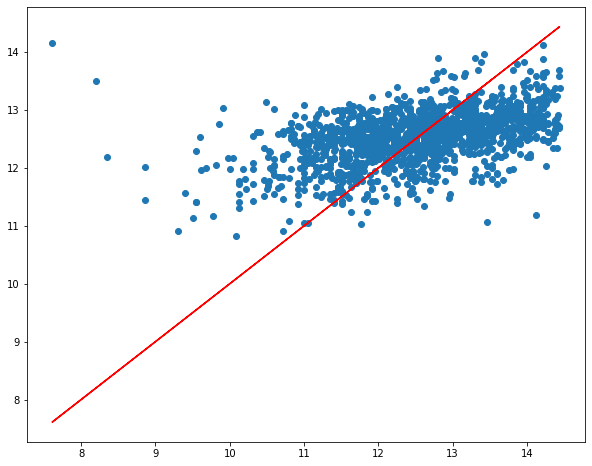

In [49]:
#X = df.drop(columns=["FIYAT","IL","ILCE","TAPU_DURUMU","MAHALLE","KREDIYE_UYGUNLUK_UYGUN DEGIL","KAT_KARSILIGI_EVET","KAT_KARSILIGI_HAYIR","TAKAS_BILINMIYOR"]).astype(float)
X = df.drop(columns=["FIYAT","IL","ILCE","MAHALLE","TAPU_DURUMU"]).astype(float)
y = df.loc[:,"FIYAT"].astype(float)
model = sm.OLS(y, X, data=df)
results = model.fit()
results.summary()

In [50]:
from sklearn import metrics

#Test veriler(X= modele dahil edilen tüm sayısal kolonlar, y= FIYAT kolonu)
X, X_test, y, y_test = train_test_split(X, y, test_size = .33, random_state = 42)
# Train verler
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = .33, random_state = 42)

"""  lm = LinearRegression()
model=lm.fit(X_train, y_train)
y_pred = model.predict(X_test)"""  
    
lm_reg = Ridge(alpha=0.5)
model=lm_reg.fit(X_train, y_train)
y_pred = model.predict(X_test)
        
    
"""poly = PolynomialFeatures(degree=2) 
X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)
#lm_poly_ri = Ridge(alpha=0.5)
lm_poly = LinearRegression()
model=lm_poly.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)    
"""
score=model.score(X_train, y_train)
print("model score:",score)



fig = plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,'r')

rf CV train : 0.18941514384446279


In [54]:
print(f'rf CV train : {cross_val_score(lm_reg, X_train, y_train, cv=2).mean()}')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.132e+26
Date:                Wed, 25 Nov 2020   Prob (F-statistic):               0.00
Time:                        12:14:23   Log-Likelihood:                 21665.
No. Observations:                 775   AIC:                        -4.329e+04
Df Residuals:                     755   BIC:                        -4.320e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
METREKARE       

/home/melek/PycharmProjects/webCrawl/venv/lib/python3.6/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in log


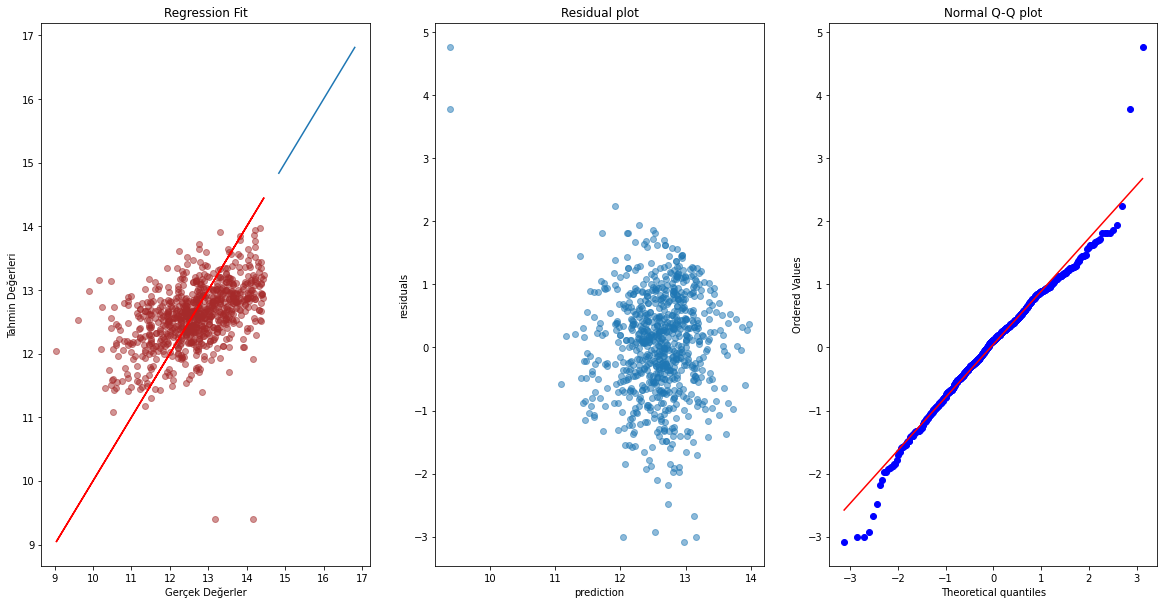

In [55]:
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
def graphs_ridge(X,y):
    #Test veriler(X= modele dahil edilen tüm sayısal kolonlar, y= FIYAT kolonu)
    X, X_test, y, y_test = train_test_split(X, y, test_size = .25, random_state = 42)
    # Train verler
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = .25, random_state = 42)
    
    
    """poly = PolynomialFeatures(degree=2) 
    X_train_poly = poly.fit_transform(X_train.values)
    X_val_poly = poly.transform(X_val.values)
    X_test_poly = poly.transform(X_test.values)
    
    lm_poly_ri = Ridge(alpha=0.5)
    model=lm_poly_ri.fit(X_train_poly, y_train)
    score=model.score(X_train_poly, y_train)
    print("model score:",score)
    y_pred = model.predict(X_test_poly)"""
   
    lm_reg = Ridge(alpha=0.5)
    model=lm_reg.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
   
    """lm = LinearRegression()
    model=lm.fit(X_train, y_train)
    y_pred = model.predict(X_test)"""  
    
    ols5 = sm.OLS(y_pred, X_test)
    print(ols5.fit().summary())
  
    
    """x_pred = np.array(["ISTANBUL","ARNAVUTKOY","DURSUNKOY","T_A","7750","MUSTAKIL PARSEL","716.333333","12500"])
    x_pred = x_pred.reshape(-1, len(X))
    print("tahmin: ",model.predict(x_pred))"""


    """IL ILCE MAHALLE ARSA_TIPI METREKARE TAPU_DURUMU METREKARE_BIRIM_FIYAT PARSEL"""

    
    
    yazdir=pd.DataFrame({"gercek_fiyat":y_test[0:10],
                         "tahmin_fiyat":y_pred[0:10]})
    print(yazdir)
    #print(y_pred[0:10])
    
    #result = lm_reg.predict(X_test)
    handin = pd.DataFrame({'Gercek_Fiyat':y_test ,'Tahmin_Fiyat': y_pred})
    handin.to_csv('TAHMIN.csv', index=False)
    
    plt.figure(figsize=[20,10])
        
    #reg fit plot
    plt.subplot(1, 3, 1)
    plt.scatter(y_test, y_pred, alpha=.5, c='brown')
    plt.plot(np.log(np.linspace(-100000,20000000,8)), np.log(np.linspace(-100000,20000000,8)))
    #plt.title('Tahmin Değerleri vs. Gerçek değerler', fontsize=22)
    plt.title("Regression Fit")
    plt.xlabel('Gerçek Değerler')
    plt.ylabel('Tahmin Değerleri')
    plt.plot(y_test,y_test,'r')   
   
    
    
    #residual plot
    plt.subplot(1, 3, 2)
    res = y_test - y_pred
    plt.scatter(y_pred, res, alpha=.5)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    #Q-Q plot
    plt.subplot(1, 3, 3)
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")
    
   



In [53]:
graphs_ridge(X,y)

Linear Regression MAE : 0.6625455573493795
Polynomial MAE : 0.8425137385442095
Poly Ridge MAE : 0.8314514012807936
Ridge MAE : 0.6627258419038269
Lasso MAE : 0.7734948260948165


/home/melek/PycharmProjects/webCrawl/venv/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.30006e-27): result may not be accurate.
  overwrite_a=True).T


In [276]:
MAE(X,y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  FIYAT   R-squared (uncentered):                   0.831
Model:                            OLS   Adj. R-squared (uncentered):              0.831
Method:                 Least Squares   F-statistic:                              6799.
Date:                Tue, 24 Nov 2020   Prob (F-statistic):                        0.00
Time:                        18:06:21   Log-Likelihood:                         -44924.
No. Observations:                6905   AIC:                                  8.986e+04
Df Residuals:                    6900   BIC:                                  8.989e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
ARSA_TIPI                -6.2011      0.612    -10.133      0.000      -7.401      -5.001
METREKARE                 0.0899      0.003     28.853      0.000       0.084       0.096
TAPU_DURUMU              65.4377      1.369     47.796      0.000      62.754      68.122
METREKARE_BIRIM_FIYAT     0.1205      0.008     14.596      0.000       0.104       0.137
PARSEL                   -0.0344      0.013     -2.560      0.010      -0.061      -0.008
==============================================================================
Omnibus:                       98.022   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.989
Skew:                           0.041   Prob(JB):                     1.55e-13
Kurtosis:                       2.555   Cond. No.                         895.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""